#**Data End-to-End Portfolio Project - RevoU 2025**

**Farhatul Fityah** (IBM HR Data Analysis)

Dataset: https://drive.google.com/file/d/1cz1Zr4EyIFxecosIhVN0xB17XZNWe6tL/view?usp=drive_link

In [181]:
#Library Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Cleaning & Preparation

In [182]:
import pandas as pd

#inputing and making dataframe for HR dataset
url_data = 'https://drive.google.com/file/d/1cz1Zr4EyIFxecosIhVN0xB17XZNWe6tL/view?usp=drive_link'
data = 'https://drive.google.com/uc?id='+ url_data.split('/')[-2]

df = pd.read_csv(data)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


*There are 1470 rows and 35 feature columns overall dataset*

##Checking Process

###Check Duplicated Data

In [183]:
df[
    df['EmployeeNumber'].duplicated()
]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


*No duplicated data found*

###Check Missing Values

In [184]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


*No missing values found in dataset*

###Check Data Info

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

*From the dataset, I did not find clear information on the use of data rates (hourly, daily, and monthly). Therefore, this data will be dropped and only `MonthlyIncome` data will be used as employee salary data. Also, `EmployeeCount`, `Over18`, and `StandardHours` data only have 1 value that is the same for all employees, which will not provide information for our analysis, so this data will also be dropped.*

*Monetary data will be converted to float for ease of aggregation.*

##Cleaning Process

###Drop Unused Columns

In [186]:
#Dropping unused and unimportant variables
#Also we didnt use some of demographic data, work section description of employee (hard to predict)
#and ID column since there was no duplicated

df = df.drop(columns=['DailyRate', 'HourlyRate', 'MonthlyRate', 'DistanceFromHome',
                      'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber',
                      'BusinessTravel', 'Department', 'Education', 'EducationField',
                      'Gender', 'JobInvolvement', 'MaritalStatus', 'NumCompaniesWorked',
                      'StockOptionLevel','TotalWorkingYears'])
df

,Age,Attrition,EnvironmentSatisfaction,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2,2,Sales Executive,4,5993,Yes,11,3,1,0,1,6,4,0,5
1,49,No,3,2,Research Scientist,2,5130,No,23,4,4,3,3,10,7,1,7
2,37,Yes,4,1,Laboratory Technician,3,2090,Yes,15,3,2,3,3,0,0,0,0
3,33,No,4,1,Research Scientist,3,2909,Yes,11,3,3,3,3,8,7,3,0
4,27,No,1,1,Laboratory Technician,2,3468,No,12,3,4,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,3,2,Laboratory Technician,4,2571,No,17,3,3,3,3,5,2,0,3
1466,39,No,4,3,Healthcare Representative,1,9991,No,15,3,1,5,3,7,7,1,7
1467,27,No,2,2,Manufacturing Director,2,6142,Yes,20,4,2,0,3,6,2,0,3
1468,49,No,4,2,Sales Executive,2,5390,No,14,3,4,3,2,9,6,0,8


###Adjusting Data Type

In [187]:
#Changing monetary variable into float for easy aggregating purpose
df['MonthlyIncome'] = df['MonthlyIncome'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   EnvironmentSatisfaction   1470 non-null   int64  
 3   JobLevel                  1470 non-null   int64  
 4   JobRole                   1470 non-null   object 
 5   JobSatisfaction           1470 non-null   int64  
 6   MonthlyIncome             1470 non-null   float64
 7   OverTime                  1470 non-null   object 
 8   PercentSalaryHike         1470 non-null   int64  
 9   PerformanceRating         1470 non-null   int64  
 10  RelationshipSatisfaction  1470 non-null   int64  
 11  TrainingTimesLastYear     1470 non-null   int64  
 12  WorkLifeBalance           1470 non-null   int64  
 13  YearsAtCompany            1470 non-null   int64  
 14  YearsInC

*Remaining 1470 rows & 17 feature columns data*

#Exploratory Data Analysis

##Checking Attrition Rate in Company

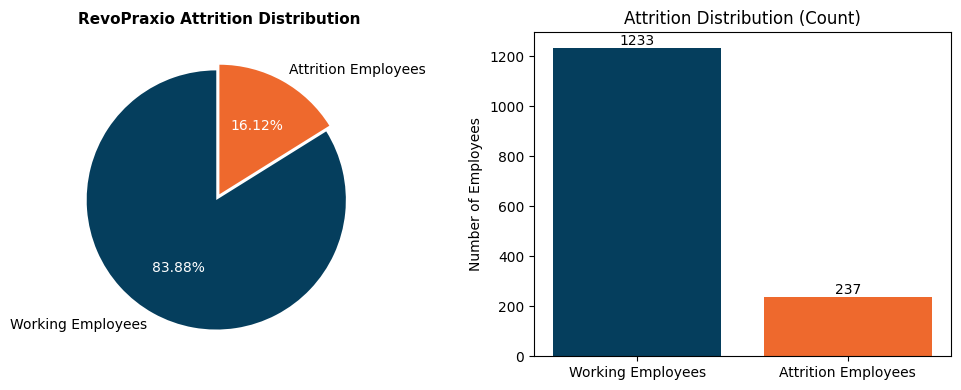

In [188]:
attrition_counts = df['Attrition'].value_counts()

# Mapping label
label_map = {'Yes': 'Attrition Employees', 'No': 'Working Employees'}
labels = [label_map[x] for x in attrition_counts.index]

colors = ['#053e5d', '#ee692d']

#pie chart (percentage)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

def func(pct):
    return f"{pct:.2f}%"

wedges, texts, autotexts = axes[0].pie(
    attrition_counts,
    labels=labels,
    autopct=func,
    colors=colors,
    startangle=90,
    explode=(0.05, 0)
)

for autotext in autotexts:
    autotext.set_color("white")

axes[0].set_title("RevoPraxio Attrition Distribution", fontsize=11, fontweight='bold')

#bar chart (count)
bars = axes[1].bar(labels, attrition_counts.values, color=colors)
axes[1].bar_label(bars)
axes[1].set_title("Attrition Distribution (Count)")
axes[1].set_ylabel("Number of Employees")

plt.tight_layout()
plt.show()

*There was `16.12%` attrition rate in RevoPraxio. Based on HR benchmarks, this places the company in the `Caution Zone (10–20%)`. While the rate is below the critical threshold of 20%, it is higher than the healthy benchmark of 10%. This suggests that RevoPraxio should monitor attrition closely, analyze key drivers, and implement targeted retention strategies to prevent further escalation into the high-risk zone.*


##Involuntary Attrition Causes Analysis


###Checking Attrition Age

In [189]:
df.groupby('Attrition')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,37.561233,8.88836,18.0,31.0,36.0,43.0,60.0
Yes,237.0,33.607595,9.68935,18.0,28.0,32.0,39.0,58.0


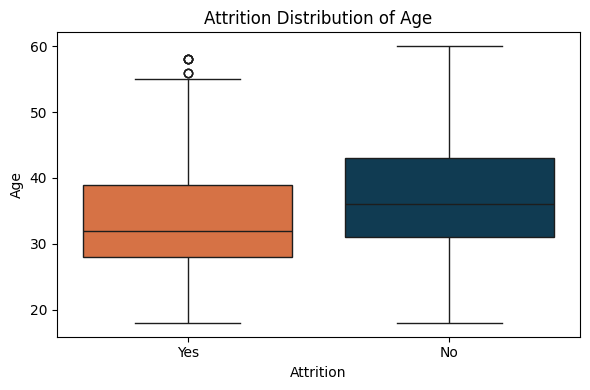

In [190]:
#Boxplot Attrition Age
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x='Attrition',
    y='Age',
    hue= 'Attrition',
    legend= False,
    palette={'No': '#053e5d', 'Yes': '#ee692d'}
)

plt.title("Attrition Distribution of Age")
plt.xlabel("Attrition")
plt.ylabel("Age")
plt.tight_layout()
plt.show()


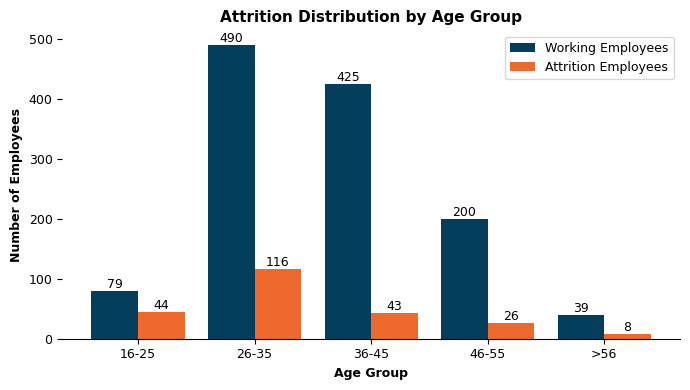

In [191]:
#Age Group Attrition Distribution

bins = [15, 25, 35, 45, 55, float('inf')]
labels = ['16-25','26-35', '36-45', '46-55', '>56']

df['age_group'] = pd.cut(
    df['Age'],
    bins=bins,
    labels=labels )

age_attrition = df.groupby(['age_group', 'Attrition'], observed=False).size().unstack(fill_value=0)

colors = ['#053e5d', '#ee692d']
ax = age_attrition.plot(
    kind='bar',
    figsize=(7,4),
    color=colors,
    width=0.8,
    fontsize=9
)
ax.set_xticklabels(age_attrition.index, rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

for container in ax.containers:
    ax.bar_label(container, fontsize=9)

plt.title("Attrition Distribution by Age Group", fontsize=11, fontweight='bold')
plt.xlabel("Age Group", fontsize=9, fontweight='bold')
plt.ylabel("Number of Employees", fontsize=9 , fontweight='bold')
plt.legend(labels=['Working Employees', 'Attrition Employees'], fontsize=9)
plt.tight_layout()
plt.show()


*The average and median age of employees experiencing attrition is still around 30, which is still considered a productive working age and has not yet reached retirement age. It can be concluded that employee attrition is not due to reaching retirement age, but due to other factors.*

###Checking Employee Performance

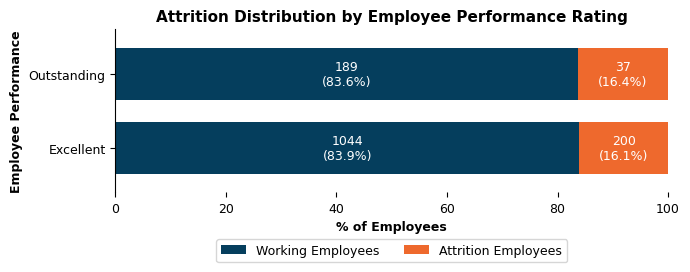

In [192]:
attrition_pr = df.groupby(['PerformanceRating', 'Attrition']).size().unstack(fill_value=0)

attrition_pr = attrition_pr.rename(columns={
    'Yes': 'Attrition Employees',
    'No': 'Working Employees'
})

rating_labels = {
    3: "Excellent",
    4: "Outstanding"
}
attrition_pr.index = attrition_pr.index.map(rating_labels)

attrition_pr_percent = attrition_pr.div(attrition_pr.sum(axis=1), axis=0) * 100

colors = ['#053e5d', '#ee692d']
ax = attrition_pr_percent.plot(
    kind='barh',
    stacked=True,
    color=colors,
    figsize=(7,3),
    width=0.7,
    fontsize= 9
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)

for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        count = attrition_pr.iloc[j, i]
        pct = attrition_pr_percent.iloc[j, i]
        if count > 0:
            ax.text(
                bar.get_x() + bar.get_width()/2,
                bar.get_y() + bar.get_height()/2,
                f"{count}\n({pct:.1f}%)",
                ha="center", va="center", color="white", fontsize=9
            )

plt.title("Attrition Distribution by Employee Performance Rating", fontsize=11, fontweight='bold')
plt.xlabel("% of Employees", fontsize=9, fontweight='bold')
plt.ylabel("Employee Performance", fontsize=9, fontweight='bold')
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.25),
    fontsize=9,
    ncol=2
)
plt.xlim(0, 100)
plt.tight_layout()
plt.show()


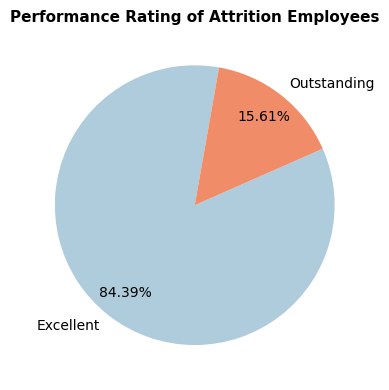

In [193]:
#Performance Rating Score from Attrition Employee
attrition_yes = df[df['Attrition'] == 'Yes']

attrition_rating = attrition_yes['PerformanceRating'].value_counts().sort_index()

rating_labels = {3: "Excellent", 4: "Outstanding"}
attrition_rating.index = attrition_rating.index.map(rating_labels)

counts = attrition_rating.values
labels = attrition_rating.index
colors = ['#aeccdc', '#f08c68']

fig, ax = plt.subplots(figsize=(4,4))

wedges, texts, autotexts = ax.pie(
    counts,
    labels=labels,             # label di luar lingkaran
    autopct='%1.2f%%',         # tampilkan persen
    pctdistance=0.8,           # posisi persen lebih ke dalam
    labeldistance=1.1,         # jarak label ke luar (semakin besar semakin jauh)
    colors=colors,
    startangle=80
)

# Tambahkan garis ke label otomatis (callouts)
for t in texts:
    t.set_fontsize(10)
for at in autotexts:
    at.set_color("black")
    at.set_fontsize(10)

ax.set_title("Performance Rating of Attrition Employees", fontsize=11, fontweight="bold")

plt.tight_layout()
plt.show()


*The distribution of employee performance ratings is similar between retired and non-retired employees. The scores also range between 3 and 4, which indicate Excellent and Outstanding. With all employees receiving good ratings, poor work performance is not a factor in attrition at RevoPraxio.*

##Voluntary Attrition Causes Analysis

##Possible attrition causes: Lack of Career Advancement Opportunities


###Years Since Last Promotion

In [194]:
df.groupby('Attrition')['YearsSinceLastPromotion'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,2.234388,3.234762,0.0,0.0,1.0,3.0,15.0
Yes,237.0,1.945148,3.153077,0.0,0.0,1.0,2.0,15.0


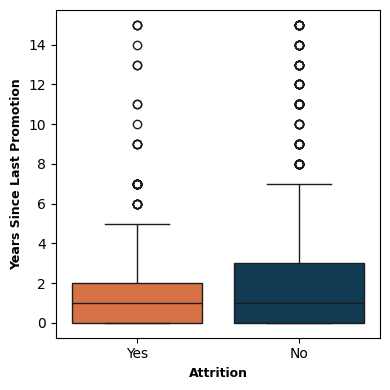

In [195]:
#Boxplot YearsSinceLastPromotion
plt.figure(figsize=(4,4))
sns.boxplot(
    data=df,
    x='Attrition',
    y='YearsSinceLastPromotion',
    hue= 'Attrition',
    legend= False,
    palette={'No': '#053e5d', 'Yes': '#ee692d'}
)

#plt.title("Attrition Distribution of Years Since Last Promotion", fontsize=11, fontweight='bold')
plt.xlabel("Attrition", fontsize=9, fontweight='bold')
plt.ylabel("Years Since Last Promotion", fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()


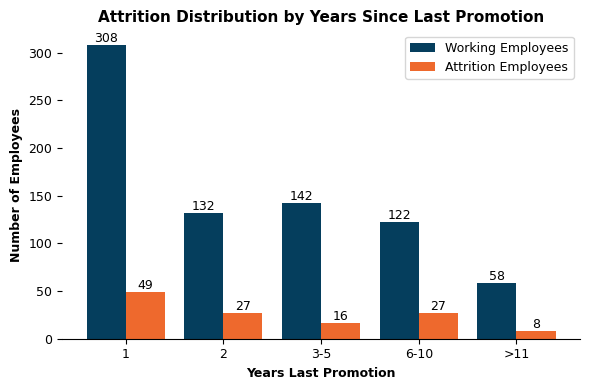

In [196]:
#Employees' Last Promotion Attrition Distribution

bins = [0, 1, 2, 5, 10, float('inf')]
labels = ['1','2','3-5', '6-10', '>11']

df['LastPromotion'] = pd.cut(
    df['YearsSinceLastPromotion'],
    bins=bins,
    labels=labels )

promotion_attrition = df.groupby(['LastPromotion', 'Attrition'], observed=False).size().unstack(fill_value=0)

colors = ['#053e5d', '#ee692d']
ax = promotion_attrition.plot(
    kind='bar',
    figsize=(6,4),
    color=colors,
    width=0.8,
    fontsize=9
)
ax.set_xticklabels(promotion_attrition.index, rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

for container in ax.containers:
    ax.bar_label(container, fontsize=9)

plt.title("Attrition Distribution by Years Since Last Promotion", fontsize=11, fontweight='bold')
plt.xlabel("Years Last Promotion", fontsize=9, fontweight='bold')
plt.ylabel("Number of Employees", fontsize=9 , fontweight='bold')
plt.legend(labels=['Working Employees', 'Attrition Employees'], fontsize=9)
plt.tight_layout()
plt.show()


*YearsSinceLastPromotion does not indicate a possible reason for someone to resign; most of those who resign are those who have just received a promotion. So this is not a factor in someone resigning from RevoPraxio.*

###Years At Company (Employees' Tenure)

In [197]:
df.groupby('Attrition')['YearsAtCompany'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,7.369019,6.096298,0.0,3.0,6.0,10.0,37.0
Yes,237.0,5.130802,5.949984,0.0,1.0,3.0,7.0,40.0


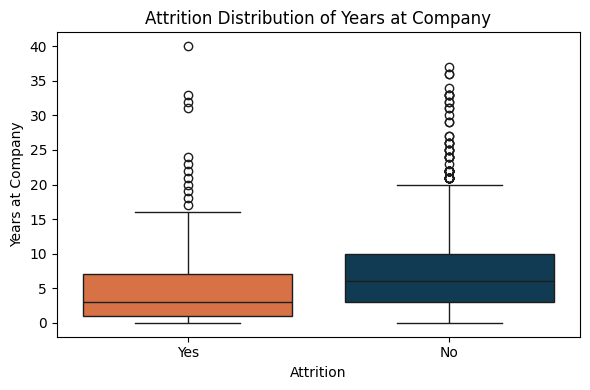

In [198]:
#Boxplot YearsAtCompany
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x='Attrition',
    y='YearsAtCompany',
    hue= 'Attrition',
    legend= False,
    palette={'No': '#053e5d', 'Yes': '#ee692d'}
)

plt.title("Attrition Distribution of Years at Company")
plt.xlabel("Attrition")
plt.ylabel("Years at Company")
plt.tight_layout()
plt.show()


*From the YearsAtCompany variable, it can be seen that employees who leave generally have shorter tenure than those who stay. The median tenure of employees who leave is only 3 years, while those who stay reach 6 years. This indicates that the risk of attrition is higher among relatively new employees, especially in the first 3–4 years, while employees who have been with the company longer tend to be more stable and stay with the company.*

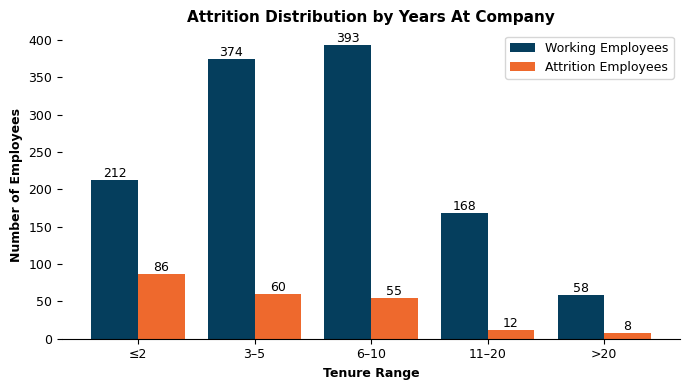

In [199]:
#Employees' Tenure Attrition Distribution

bins = [0,2, 5,10, 20, float('inf')]
labels = ["≤2", "3–5", "6–10", "11–20", ">20"]

df['tenure'] = pd.cut(
    df['YearsAtCompany'],
    bins=bins,
    labels=labels )

tenure_attrition = df.groupby(['tenure', 'Attrition'], observed=False).size().unstack(fill_value=0)

colors = ['#053e5d', '#ee692d']
ax = tenure_attrition.plot(
    kind='bar',
    figsize=(7,4),
    color=colors,
    width=0.8,
    fontsize=9
)
ax.set_xticklabels(tenure_attrition.index, rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

for container in ax.containers:
    ax.bar_label(container, fontsize=9)

plt.title("Attrition Distribution by Years At Company", fontsize=11, fontweight='bold')
plt.xlabel("Tenure Range", fontsize=9, fontweight='bold')
plt.ylabel("Number of Employees", fontsize=9 , fontweight='bold')
plt.legend(labels=['Working Employees', 'Attrition Employees'], fontsize=9)
plt.tight_layout()
plt.show()


###Years In Current Role

In [200]:
df.groupby('Attrition')['YearsInCurrentRole'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,4.484185,3.649402,0.0,2.0,3.0,7.0,18.0
Yes,237.0,2.902954,3.174827,0.0,0.0,2.0,4.0,15.0


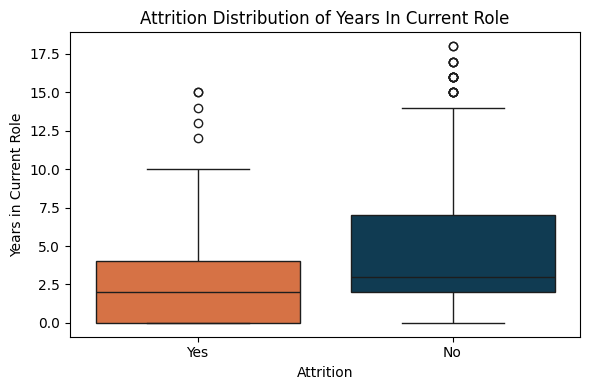

In [201]:
#Boxplot YearsInCurrentRole
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x='Attrition',
    y='YearsInCurrentRole',
    hue= 'Attrition',
    legend= False,
    palette={'No': '#053e5d', 'Yes': '#ee692d'}
)

plt.title("Attrition Distribution of Years In Current Role")
plt.xlabel("Attrition")
plt.ylabel("Years in Current Role")
plt.tight_layout()
plt.show()


*Similar to company tenure, YearsInCurrentRole also shows that employees who are new to their role (0–2 years) have a higher risk of leaving than those who are settled in their role (≥3 years). This is also one of the attrition factors at RevoPraxio.*

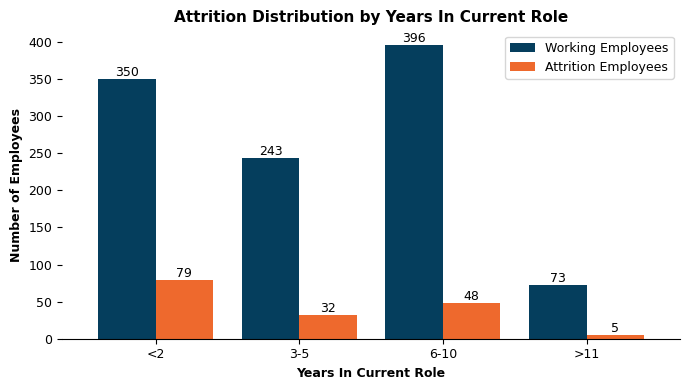

In [202]:
#YearsInCurrentRole Attrition Distribution

bins = [0,2, 5,10,  float('inf')]
labels = ['<2','3-5', '6-10', '>11' ]

df['CurrentRole'] = pd.cut(
    df['YearsInCurrentRole'],
    bins=bins,
    labels=labels )

cr_attrition = df.groupby(['CurrentRole', 'Attrition'], observed=False).size().unstack(fill_value=0)

colors = ['#053e5d', '#ee692d']
ax = cr_attrition.plot(
    kind='bar',
    figsize=(7,4),
    color=colors,
    width=0.8,
    fontsize=9
)
ax.set_xticklabels(cr_attrition.index, rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

for container in ax.containers:
    ax.bar_label(container, fontsize=9)

plt.title("Attrition Distribution by Years In Current Role", fontsize=11, fontweight='bold')
plt.xlabel("Years In Current Role", fontsize=9, fontweight='bold')
plt.ylabel("Number of Employees", fontsize=9 , fontweight='bold')
plt.legend(labels=['Working Employees', 'Attrition Employees'], fontsize=9)
plt.tight_layout()
plt.show()


###Attrition Distribution by Job Level

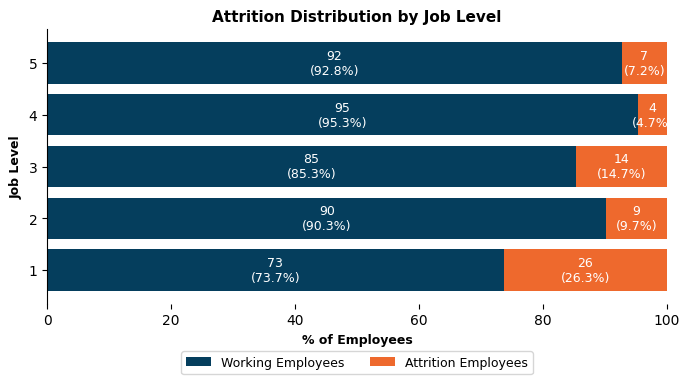

In [203]:
attrition_jl = df.groupby(['JobLevel', 'Attrition']).size().unstack(fill_value=0)

attrition_jl = attrition_jl.rename(columns={'Yes': 'Attrition Employees',
                                                    'No': 'Working Employees'})
colors = ['#053e5d', '#ee692d']

attrition_jl_percent = attrition_jl.div(attrition_jl.sum(axis=1), axis=0) * 100
ax = attrition_jl_percent.plot(kind='barh', stacked=True, color=colors, figsize=(7,4), width=0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)

for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        count = int(bar.get_width())
        pct = attrition_jl_percent.iloc[j, i]
        if count > 0:
            ax.text(bar.get_x() + bar.get_width()/2,
                    bar.get_y() + bar.get_height()/2,
                    f"{count}\n({pct:.1f}%)",
                    ha="center", va="center", color="white", fontsize=9)

plt.title("Attrition Distribution by Job Level", fontsize=11, fontweight='bold')
plt.xlabel("% of Employees", fontsize=9, fontweight='bold')
plt.ylabel("Job Level", fontsize=9, fontweight='bold')
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    fontsize=9,
    ncol=2
)
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

*Attrition occurs most frequently among lower-level employees. Management should focus on strengthening retention at the entry-mid level (particularly levels 1 and 3) through compensation policies, career paths, and development support.*

###Limited Training Support

In [204]:
df.groupby('Attrition')['TrainingTimesLastYear'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,2.832928,1.293585,0.0,2.0,3.0,3.0,6.0
Yes,237.0,2.624473,1.254784,0.0,2.0,2.0,3.0,6.0


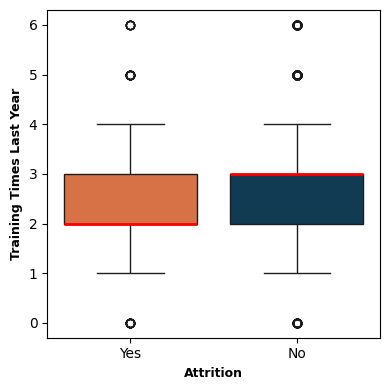

In [205]:
#Boxplot TrainingTimesLastYear
plt.figure(figsize=(4,4))
sns.boxplot(
    data=df,
    x='Attrition',
    y='TrainingTimesLastYear',
    hue= 'Attrition',
    legend= False,
    palette={'No': '#053e5d', 'Yes': '#ee692d'},
    medianprops={"color": "red", "linewidth": 2}
)

#plt.title("Attrition Distribution of Training Times Last Year", fontsize=11, fontweight='bold')
plt.xlabel("Attrition", fontsize=9, fontweight='bold')
plt.ylabel("Training Times Last Year", fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()


*The TrainingTimesLastYear statistics show no significant difference between attrition and non-attrition employees. The average number of training sessions for attrition employees is slightly lower, and the median shows that attrition employees generally attend 2 training sessions, while non-attrition employees attend 3 training sessions. Although the difference is small, this factor should still be taken into consideration because attrition employees tend to receive less training than those who remain with the company.*

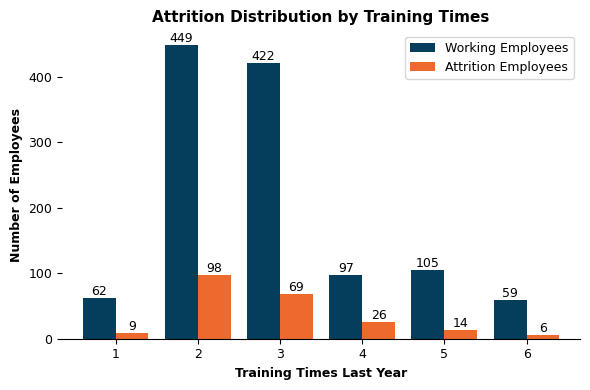

In [206]:
#TrainingTimesLastYear Attrition Distribution
training_attrition = (
    df[df['TrainingTimesLastYear'].between(1, 10)]
    .groupby(['TrainingTimesLastYear', 'Attrition'], observed=False)
    .size()
    .unstack(fill_value=0)
)

colors = ['#053e5d', '#ee692d']

ax = training_attrition.plot(
    kind='bar',
    figsize=(6,4),
    color=colors,
    width=0.8,
    fontsize=9
)

ax.set_xticks(range(len(training_attrition.index)))
ax.set_xticklabels(training_attrition.index, rotation=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

for container in ax.containers:
    ax.bar_label(container, fontsize=9)

plt.title("Attrition Distribution by Training Times", fontsize=11, fontweight='bold')
plt.xlabel("Training Times Last Year", fontsize=9, fontweight='bold')
plt.ylabel("Number of Employees", fontsize=9, fontweight='bold')
plt.legend(labels=['Working Employees', 'Attrition Employees'], fontsize=9)
plt.tight_layout()
plt.show()


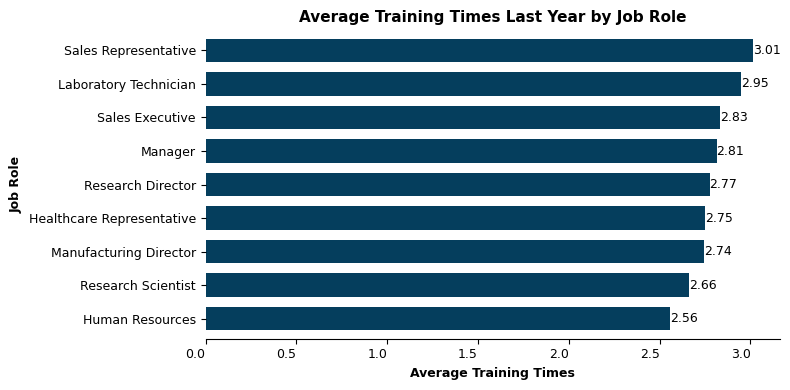

In [207]:
# Hitung rata-rata training times per JobRole
avg_training = df.groupby('JobRole')['TrainingTimesLastYear'].mean().sort_values()

# Plot bar chart rata-rata training times
colors = ['#053e5d']
ax = avg_training.plot(
    kind='barh',
    figsize=(8,4),
    color=colors,
    width=0.7,
    fontsize=9
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=9)  # tampilkan 2 desimal

plt.title("Average Training Times Last Year by Job Role", fontsize=11, fontweight='bold')
plt.xlabel("Average Training Times", fontsize=9, fontweight='bold')
plt.ylabel("Job Role", fontsize=9, fontweight='bold')
plt.xticks(rotation=0, ha="right")  # biar label job role kebaca
plt.tight_layout()
plt.show()


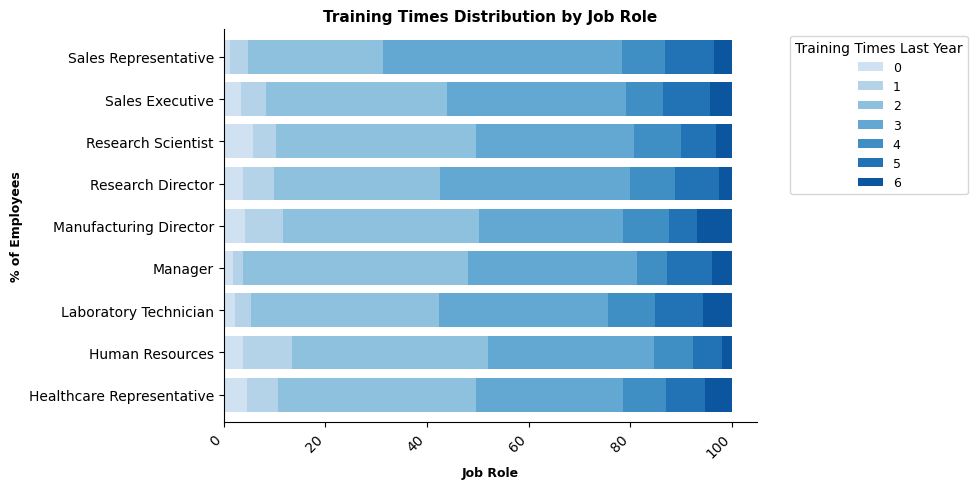

In [208]:
# Kelompokkan training times 1-10 (atau >10 jadi kategori sendiri)
df['TrainingTimesCat'] = df['TrainingTimesLastYear'].apply(
    lambda x: str(x) if x <= 10 else '>10'
)

# Hitung jumlah per JobRole dan TrainingTimes
training_jobrole = (
    df.groupby(['JobRole', 'TrainingTimesCat'], observed=False)
    .size()
    .unstack(fill_value=0)
)

# Ubah ke proporsi (%)
training_jobrole_percent = training_jobrole.div(training_jobrole.sum(axis=1), axis=0) * 100

# Plot 100% stacked bar chart
colors = plt.cm.Blues(range(50, 250, int(200/len(training_jobrole_percent.columns))))

ax = training_jobrole_percent.plot(
    kind='barh',
    stacked=True,
    figsize=(10,5),
    color=colors,
    width=0.8
)

# Styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("% of Employees", fontsize=9, fontweight='bold')
ax.set_xlabel("Job Role", fontsize=9, fontweight='bold')
ax.set_title("Training Times Distribution by Job Role", fontsize=11, fontweight='bold')
plt.xticks(rotation=45, ha="right")

# Legend
plt.legend(title="Training Times Last Year", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()


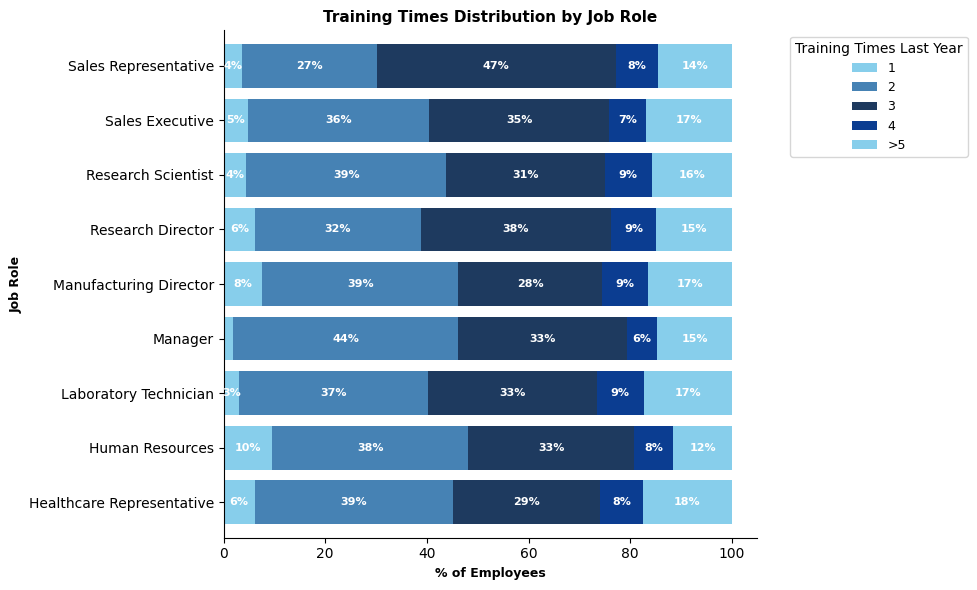

In [209]:
import matplotlib.pyplot as plt

# Buat kategori training sesuai request
def training_cat(x):
    if x == 1:
        return "1"
    elif x == 2:
        return "2"
    elif x == 3:
        return "3"
    elif x == 4:
        return "4"
    else:
        return ">5"

df['TrainingCategory'] = df['TrainingTimesLastYear'].apply(training_cat)

# Hitung distribusi per JobRole
training_jobrole = (
    df.groupby(['JobRole', 'TrainingCategory'], observed=False)
    .size()
    .unstack(fill_value=0)
)

# Ubah ke persentase (%)
training_jobrole_percent = training_jobrole.div(training_jobrole.sum(axis=1), axis=0) * 100

# Plot horizontal stacked bar
colors = ['#87CEEB', '#4682B4', '#1E3A5F', '#0B3D91']  # warna berbeda tiap kategori
ax = training_jobrole_percent.plot(
    kind='barh',
    stacked=True,
    figsize=(10,6),
    color=colors,
    width=0.8
)

# Tambahkan persentase di dalam bar
for i, (idx, row) in enumerate(training_jobrole_percent.iterrows()):
    cum_value = 0
    for j, val in enumerate(row):
        if val > 3:  # tampilkan hanya kalau >3% biar tidak ramai
            ax.text(
                cum_value + val/2,
                i,
                f"{val:.0f}%",
                ha='center',
                va='center',
                fontsize=8,
                color='white',
                fontweight='bold'
            )
        cum_value += val

# Styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("% of Employees", fontsize=9, fontweight='bold')
ax.set_ylabel("Job Role", fontsize=9, fontweight='bold')
ax.set_title("Training Times Distribution by Job Role", fontsize=11, fontweight='bold')
plt.legend(title="Training Times Last Year", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()


##Possible attrition causes: Excessive Workload

###Attrition Distribution by OverTime

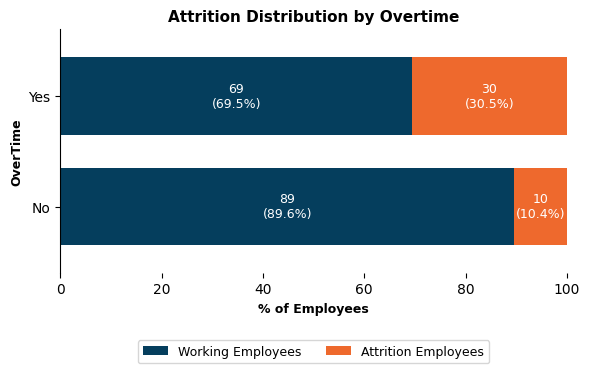

In [210]:
attrition_overtime = df.groupby(['OverTime', 'Attrition']).size().unstack(fill_value=0)

attrition_overtime = attrition_overtime.rename(columns={'Yes': 'Attrition Employees',
                                                        'No': 'Working Employees'})

colors = ['#053e5d', '#ee692d']

attrition_overtime_percent = attrition_overtime.div(attrition_overtime.sum(axis=1), axis=0) * 100
ax = attrition_overtime_percent.plot(kind='barh', stacked=True, color=colors, figsize=(6,4), width=0.7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)

for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        count = int(bar.get_width())
        pct = attrition_overtime_percent.iloc[j, i]
        if count > 0:
            ax.text(bar.get_x() + bar.get_width()/2,
                    bar.get_y() + bar.get_height()/2,
                    f"{count}\n({pct:.1f}%)",
                    ha="center", va="center", color="white", fontsize=9)

plt.title("Attrition Distribution by Overtime", fontsize=11, fontweight='bold')
plt.xlabel("% of Employees", fontsize=9, fontweight='bold')
plt.ylabel("OverTime", fontsize=9, fontweight='bold')
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.25),
    fontsize=9,
    ncol=2
)
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

*Attrition is much higher among employees who work overtime. 30,5% vs. 10,4% → almost three times higher than those who do not work overtime. **Which means, Overtime is one of the most significant attrition drivers**.*

###Attrition Distribution by Work Life Balance Category

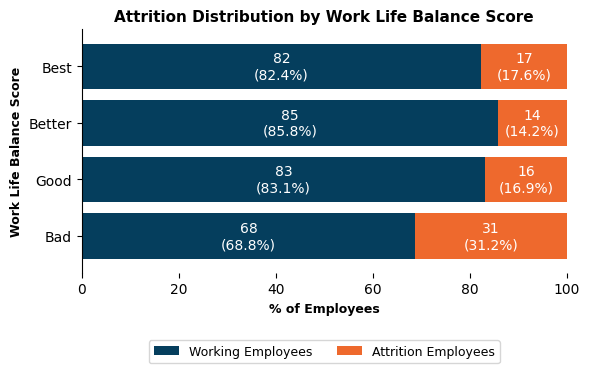

In [211]:
attrition_wlb = df.groupby(['WorkLifeBalance', 'Attrition']).size().unstack(fill_value=0)

attrition_wlb = attrition_wlb.rename(columns={'Yes': 'Attrition Employees',
                                                    'No': 'Working Employees'})
colors = ['#053e5d', '#ee692d']

rating_labels = {
    1: "Bad",
    2: "Good",
    3: "Better",
    4: "Best"
}
attrition_wlb.index = attrition_wlb.index.map(rating_labels)

attrition_wlb_percent = attrition_wlb.div(attrition_wlb.sum(axis=1), axis=0) * 100
ax = attrition_wlb_percent.plot(kind='barh', stacked=True, color=colors, figsize=(6,4), width=0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)

for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        count = int(bar.get_width())
        pct = attrition_wlb_percent.iloc[j, i]
        if count > 0:
            ax.text(bar.get_x() + bar.get_width()/2,
                    bar.get_y() + bar.get_height()/2,
                    f"{count}\n({pct:.1f}%)",
                    ha="center", va="center", color="white", fontsize=10)

plt.title("Attrition Distribution by Work Life Balance Score", fontsize=11, fontweight='bold')
plt.xlabel("% of Employees", fontsize=9, fontweight='bold')
plt.ylabel("Work Life Balance Score", fontsize=9, fontweight='bold')
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.25),
    fontsize=9,
    ncol=2
)
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

*Work-life balance has a significant effect on attrition. Employees with the lowest scores (Bad) have the highest attrition rate (31.3%), more than double that of other scores. **This shows that poor work-life balance is one of the main factors causing employees to leave**.*

##Possible attrition causes: Low Salary Competitiveness

###Attrition by Monthly Income

In [212]:
df.groupby('Attrition')['MonthlyIncome'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,6832.739659,4818.208001,1051.0,3211.0,5204.0,8834.0,19999.0
Yes,237.0,4787.092827,3640.210367,1009.0,2373.0,3202.0,5916.0,19859.0


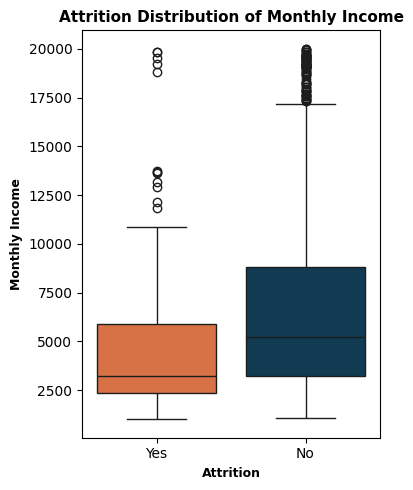

In [213]:
#Boxplot MonthlyIncome
plt.figure(figsize=(4,5))
sns.boxplot(
    data=df,
    x='Attrition',
    y='MonthlyIncome',
    hue= 'Attrition',
    legend= False,
    palette={'No': '#053e5d', 'Yes': '#ee692d'}
)

plt.title("Attrition Distribution of Monthly Income", fontsize=11, fontweight='bold')
plt.xlabel("Attrition", fontsize=9, fontweight='bold')
plt.ylabel("Monthly Income", fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()


*The median income of employees who left was only 3,202, far below the median income of employees who stayed (5,204). The average difference was also quite large (~2,000 lower). Employees who left were mostly concentrated in the <6,000 income bracket, while those who stayed had a wider distribution, up to >10,000. Monthly income appears to be a significant factor affecting attrition. Employees with lower incomes are more likely to resign than those with middle to high incomes.*

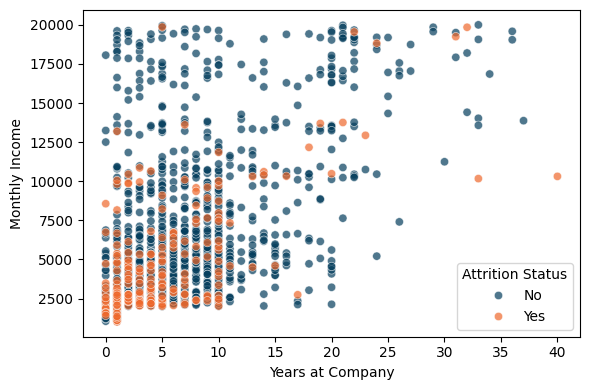

In [214]:
#Scatter Plot Attrition: Salary vs Employee Tenure

df_sorted = df.sort_values(by="Attrition", ascending=True)

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df_sorted,
    x="YearsAtCompany",
    y="MonthlyIncome",
    hue="Attrition",
    palette={"No": "#053e5d", "Yes": "#ee692d"},
    alpha=0.7
)

plt.xlabel("Years at Company")
plt.ylabel("Monthly Income")
plt.legend(title="Attrition Status")
plt.tight_layout()
plt.show()


###Attrition by Percent Salary Hike

In [215]:
df.groupby('Attrition')['PercentSalaryHike'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,15.231144,3.639511,11.0,12.0,14.0,18.0,25.0
Yes,237.0,15.097046,3.770294,11.0,12.0,14.0,17.0,25.0


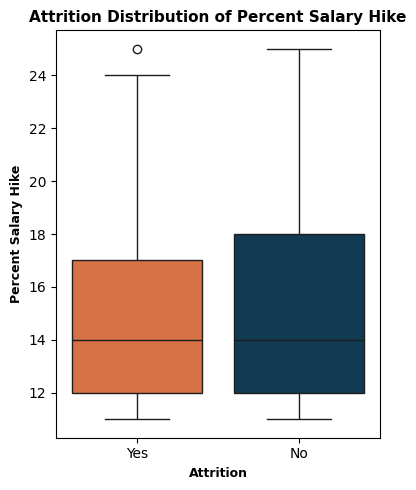

In [216]:
#Boxplot PercentSalaryHike
plt.figure(figsize=(4,5))
sns.boxplot(
    data=df,
    x='Attrition',
    y='PercentSalaryHike',
    hue= 'Attrition',
    legend= False,
    palette={'No': '#053e5d', 'Yes': '#ee692d'}
)

plt.title("Attrition Distribution of Percent Salary Hike", fontsize=11, fontweight='bold')
plt.xlabel("Attrition", fontsize=9, fontweight='bold')
plt.ylabel("Percent Salary Hike", fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()


*Percent Salary Hike shows no significant difference between employees who leave and those who stay. In other words, annual salary increases are relatively uniform and do not appear to be a dominant factor in attrition decisions.*

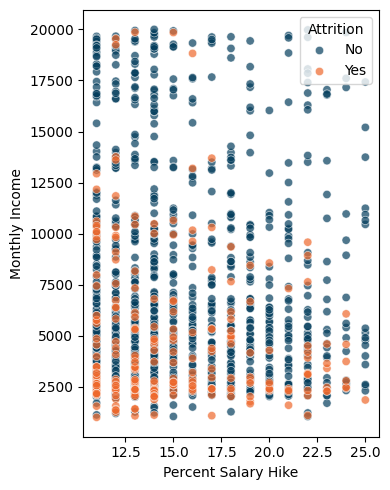

In [217]:
#Scatter Plot Attrition: Salary vs Percent Salary Hike

df_sorted = df.sort_values(by="Attrition", ascending=True)

plt.figure(figsize=(4,5))
sns.scatterplot(
    data=df_sorted,
    x="PercentSalaryHike",
    y="MonthlyIncome",
    hue="Attrition",
    palette={"No": "#053e5d", "Yes": "#ee692d"},
    alpha=0.7
)

plt.xlabel("Percent Salary Hike")
plt.ylabel("Monthly Income")

plt.tight_layout()
plt.show()


##Possible attrition causes: Work Culture & Relationship Dissatisfaction

###Attrition Distribution by Environment Satisfaction

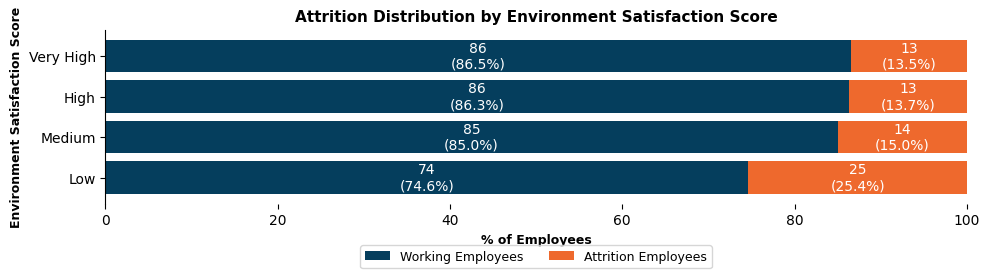

In [218]:
attrition_env = df.groupby(['EnvironmentSatisfaction', 'Attrition']).size().unstack(fill_value=0)

attrition_env = attrition_env.rename(columns={'Yes': 'Attrition Employees',
                                                    'No': 'Working Employees'})
colors = ['#053e5d', '#ee692d']

rating_labels = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}
attrition_env.index = attrition_env.index.map(rating_labels)
attrition_env_percent = attrition_env.div(attrition_env.sum(axis=1), axis=0) * 100
ax = attrition_env_percent.plot(kind='barh', stacked=True, color=colors, figsize=(10,3), width=0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)

for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        count = int(bar.get_width())
        pct = attrition_env_percent.iloc[j, i]
        if count > 0:
            ax.text(bar.get_x() + bar.get_width()/2,
                    bar.get_y() + bar.get_height()/2,
                    f"{count}\n({pct:.1f}%)",
                    ha="center", va="center", color="white", fontsize=10)

plt.title("Attrition Distribution by Environment Satisfaction Score", fontsize=11, fontweight='bold')
plt.xlabel("% of Employees", fontsize=9, fontweight='bold')
plt.ylabel("Environment Satisfaction Score", fontsize=9, fontweight='bold')
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.20),
    fontsize=9,
    ncol=2
)
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

*The highest attrition rate occurred at the lowest level of satisfaction (Level 1), which was 25.4% (72 out of 284 employees). This means that employees who are dissatisfied with their work environment tend to leave more often. Companies need to pay more attention to improving the work environment, especially for employees who feel dissatisfied.*

###Attrition Distribution by Job Satisfaction

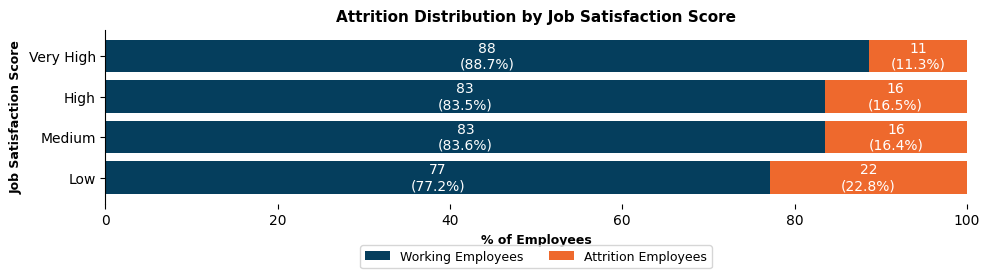

In [219]:
attrition_js = df.groupby(['JobSatisfaction', 'Attrition']).size().unstack(fill_value=0)

attrition_js = attrition_js.rename(columns={'Yes': 'Attrition Employees',
                                                    'No': 'Working Employees'})
colors = ['#053e5d', '#ee692d']

rating_labels = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}
attrition_js.index = attrition_js.index.map(rating_labels)
attrition_js_percent = attrition_js.div(attrition_js.sum(axis=1), axis=0) * 100
ax = attrition_js_percent.plot(kind='barh', stacked=True, color=colors, figsize=(10,3), width=0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)

for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        count = int(bar.get_width())
        pct = attrition_js_percent.iloc[j, i]
        if count > 0:
            ax.text(bar.get_x() + bar.get_width()/2,
                    bar.get_y() + bar.get_height()/2,
                    f"{count}\n({pct:.1f}%)",
                    ha="center", va="center", color="white", fontsize=10)

plt.title("Attrition Distribution by Job Satisfaction Score", fontsize=11, fontweight='bold')
plt.xlabel("% of Employees", fontsize=9, fontweight='bold')
plt.ylabel("Job Satisfaction Score", fontsize=9, fontweight='bold')
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.20),
    fontsize=9,
    ncol=2
)
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

*The highest attrition rate occurred at the lowest level of job satisfaction (Level 1), which was 22.8% (66 out of 289 employees). This means that employees who are dissatisfied with their jobs tend to leave more often.*

###Attrition Distribution by Relationship Satisfaction

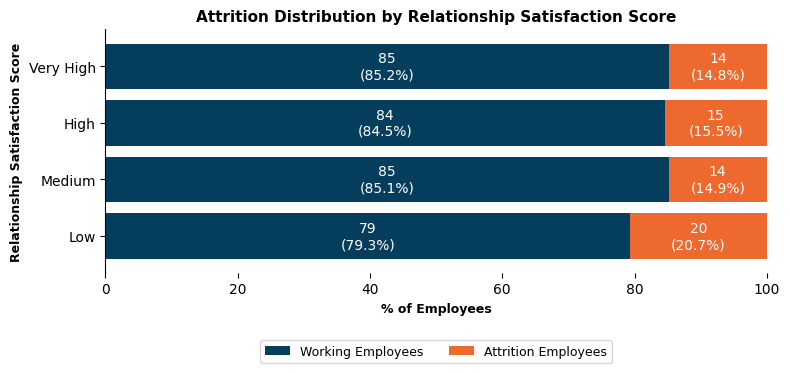

In [220]:
attrition_rs = df.groupby(['RelationshipSatisfaction', 'Attrition']).size().unstack(fill_value=0)

attrition_rs = attrition_rs.rename(columns={'Yes': 'Attrition Employees',
                                                    'No': 'Working Employees'})
colors = ['#053e5d', '#ee692d']

rating_labels = {
    1: "Low",
    2: "Medium",
    3: "High",
    4: "Very High"
}
attrition_rs.index = attrition_rs.index.map(rating_labels)
attrition_rs_percent = attrition_rs.div(attrition_rs.sum(axis=1), axis=0) * 100
ax = attrition_rs_percent.plot(kind='barh', stacked=True, color=colors, figsize=(8,4), width=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)

for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        count = int(bar.get_width())
        pct = attrition_rs_percent.iloc[j, i]
        if count > 0:
            ax.text(bar.get_x() + bar.get_width()/2,
                    bar.get_y() + bar.get_height()/2,
                    f"{count}\n({pct:.1f}%)",
                    ha="center", va="center", color="white", fontsize=10)

plt.title("Attrition Distribution by Relationship Satisfaction Score", fontsize=11, fontweight='bold')
plt.xlabel("% of Employees", fontsize=9, fontweight='bold')
plt.ylabel("Relationship Satisfaction Score", fontsize=9, fontweight='bold')
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.25),
    fontsize=9,
    ncol=2
)
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

*The highest attrition rate was found at the lowest level of relationship satisfaction (Level 1) with 20.7% (57 out of 276 employees). This shows that dissatisfaction in work relationships or social interactions in the workplace can increase the likelihood of employees leaving.*

###Descriptive Statistics by Years with Current Manager

In [221]:
df.groupby('Attrition')['YearsWithCurrManager'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,4.367397,3.594116,0.0,2.0,3.0,7.0,17.0
Yes,237.0,2.852321,3.143349,0.0,0.0,2.0,5.0,14.0


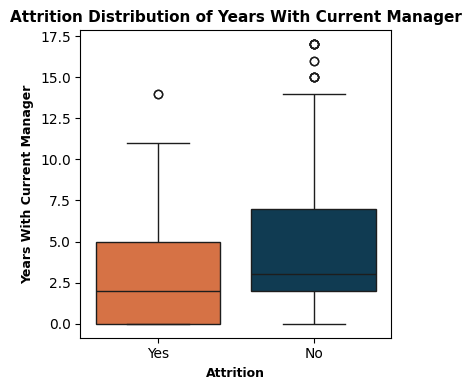

In [222]:
#Boxplot YearsWithCurrManager
plt.figure(figsize=(4,4))
sns.boxplot(
    data=df,
    x='Attrition',
    y='YearsWithCurrManager',
    hue= 'Attrition',
    legend= False,
    palette={'No': '#053e5d', 'Yes': '#ee692d'}
)

plt.title("Attrition Distribution of Years With Current Manager", fontsize=11, fontweight='bold')
plt.xlabel("Attrition", fontsize=9, fontweight='bold')
plt.ylabel("Years With Current Manager", fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()


*Although the difference is not too huge, employees who have worked with their current manager for a shorter period of time tend to be more prone to attrition. This factor may be related to their relationship with their manager, adaptation to a new leadership style, or discomfort after a rotation/transfer to a new team.*

#Predictive Model: Logistic Regression

##Data Preparation

In [223]:
#Import Library

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [224]:
df_lr = df.copy()
df_lr

,Age,Attrition,EnvironmentSatisfaction,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,OverTime,PercentSalaryHike,PerformanceRating,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_group,LastPromotion,tenure,CurrentRole,TrainingTimesCat,TrainingCategory
0,41,Yes,2,2,Sales Executive,4,5993.0,Yes,11,3,...,6,4,0,5,36-45,NaN,6–10,3-5,0,>5
1,49,No,3,2,Research Scientist,2,5130.0,No,23,4,...,10,7,1,7,46-55,1,6–10,6-10,3,3
2,37,Yes,4,1,Laboratory Technician,3,2090.0,Yes,15,3,...,0,0,0,0,36-45,NaN,NaN,NaN,3,3
3,33,No,4,1,Research Scientist,3,2909.0,Yes,11,3,...,8,7,3,0,26-35,3-5,6–10,6-10,3,3
4,27,No,1,1,Laboratory Technician,2,3468.0,No,12,3,...,2,2,2,2,26-35,2,≤2,<2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,3,2,Laboratory Technician,4,2571.0,No,17,3,...,5,2,0,3,36-45,NaN,3–5,<2,3,3
1466,39,No,4,3,Healthcare Representative,1,9991.0,No,15,3,...,7,7,1,7,36-45,1,6–10,6-10,5,>5
1467,27,No,2,2,Manufacturing Director,2,6142.0,Yes,20,4,...,6,2,0,3,26-35,NaN,6–10,<2,0,>5
1468,49,No,4,2,Sales Executive,2,5390.0,No,14,3,...,9,6,0,8,46-55,NaN,6–10,6-10,3,3


Based on the EDA results, we selected the 7 variables that had the  impact on the voluntary attrition. Which is `OverTime` and `WorkLifeBalance` shows excessive workload, `MonthlyIncome` showing low salary factor, `JobSatisfaction` and `EnvironmentSatisfaction` showing employee's work culture satisfaction, `RelationshipSatisfaction` and `YearsWithCurrManager` that showing coworker relationship behavior. `Attrition` as target variable.

In [225]:
#We select those variables as our feature for new logistic regression's dataframe
df_lr = df_lr[['OverTime', 'WorkLifeBalance', 'MonthlyIncome', 'JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'YearsWithCurrManager', 'Attrition']]
df_lr

,OverTime,WorkLifeBalance,MonthlyIncome,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,YearsWithCurrManager,Attrition
0,Yes,1,5993.0,4,2,1,5,Yes
1,No,3,5130.0,2,3,4,7,No
2,Yes,3,2090.0,3,4,2,0,Yes
3,Yes,3,2909.0,3,4,3,0,No
4,No,3,3468.0,2,1,4,2,No
...,...,...,...,...,...,...,...,...
1465,No,3,2571.0,4,3,3,3,No
1466,No,3,9991.0,1,4,1,7,No
1467,Yes,3,6142.0,2,2,2,3,No
1468,No,2,5390.0,2,4,4,8,No


In [226]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   OverTime                  1470 non-null   object 
 1   WorkLifeBalance           1470 non-null   int64  
 2   MonthlyIncome             1470 non-null   float64
 3   JobSatisfaction           1470 non-null   int64  
 4   EnvironmentSatisfaction   1470 non-null   int64  
 5   RelationshipSatisfaction  1470 non-null   int64  
 6   YearsWithCurrManager      1470 non-null   int64  
 7   Attrition                 1470 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 92.0+ KB


##Feature Engineering

###Encoding Categorical Variable

using label encoding for binary data, since the data that we have just Yes/No. The data will be labeled with Yes = 1, No = 0.
We use the map function for convenience, since the data is not too large.

In [227]:
#Spread categorical column
df_non_numeric = df_lr.select_dtypes(exclude='number')
df_non_numeric

,OverTime,Attrition
0,Yes,Yes
1,No,No
2,Yes,Yes
3,Yes,No
4,No,No
...,...,...
1465,No,No
1466,No,No
1467,Yes,No
1468,No,No


In [228]:
#Label Encoding using map
df_non_numeric['OverTime'] = df_non_numeric['OverTime'].map({'Yes': 1, 'No': 0})
df_non_numeric['Attrition'] = df_non_numeric['Attrition'].map({'Yes': 1, 'No': 0})

print(df_non_numeric.head())
print(df_non_numeric.dtypes)


   OverTime  Attrition
0         1          1
1         0          0
2         1          1
3         1          0
4         0          0
OverTime     int64
Attrition    int64
dtype: object


In [229]:
#recombine all columns
df_numeric = df_lr.select_dtypes(include='number')
df_encoded = pd.concat([df_numeric, df_non_numeric], axis=1)
df_encoded.head()

,WorkLifeBalance,MonthlyIncome,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,YearsWithCurrManager,OverTime,Attrition
0,1,5993.0,4,2,1,5,1,1
1,3,5130.0,2,3,4,7,0,0
2,3,2090.0,3,4,2,0,1,1
3,3,2909.0,3,4,3,0,1,0
4,3,3468.0,2,1,4,2,0,0


In [230]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WorkLifeBalance           1470 non-null   int64  
 1   MonthlyIncome             1470 non-null   float64
 2   JobSatisfaction           1470 non-null   int64  
 3   EnvironmentSatisfaction   1470 non-null   int64  
 4   RelationshipSatisfaction  1470 non-null   int64  
 5   YearsWithCurrManager      1470 non-null   int64  
 6   OverTime                  1470 non-null   int64  
 7   Attrition                 1470 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 92.0 KB


*All columns data already in numerical*

##Split Train & Test Data

In [231]:
target_column = 'Attrition'
features = df_encoded.drop(columns=target_column).copy()
label = df_encoded[target_column].copy()

In [232]:
features.head() #X data

,WorkLifeBalance,MonthlyIncome,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,YearsWithCurrManager,OverTime
0,1,5993.0,4,2,1,5,1
1,3,5130.0,2,3,4,7,0
2,3,2090.0,3,4,2,0,1
3,3,2909.0,3,4,3,0,1
4,3,3468.0,2,1,4,2,0


In [233]:
label.head() #target = Y data

,Attrition
0,1
1,0
2,1
3,0
4,0


In [234]:
# We define 0.3 for the test size, so 30% of our data will go to testing set
x_training, x_test, y_training, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

In [235]:
# Check split result
for df in [x_training, x_test, y_training, y_test]:
  print(df.shape)

(1029, 7)
(441, 7)
(1029,)
(441,)


##EDA On Training Dataset

###Target Balance Check

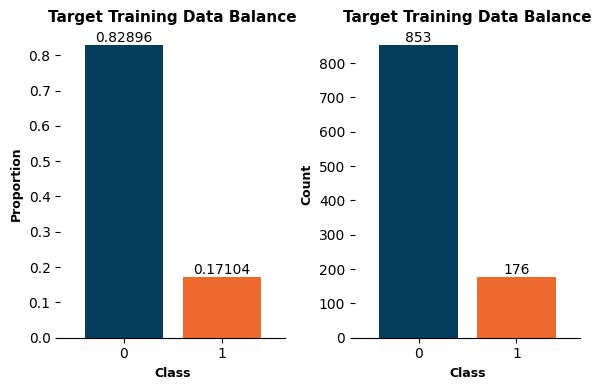

In [236]:
# Visualization of target training data balance checking
fig, axes = plt.subplots(1, 2, figsize=(6,4))

# Proportion Data Distribution Chart
values_prop = y_training.value_counts(normalize=True).plot(
    kind='bar',
    color=['#053e5d', '#ee692d'],
    ax=axes[0],
    width=0.8
)
axes[0].bar_label(values_prop.containers[0])
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_xlabel("Class", fontsize = 9, fontweight = 'bold')
axes[0].set_ylabel("Proportion", fontsize = 9, fontweight = 'bold')
axes[0].set_title("Target Training Data Balance", fontsize = 11, fontweight = 'bold')

for spine in ['top','right','left']:
    axes[0].spines[spine].set_visible(False)

# Count Data Distribution Chart
values_count = y_training.value_counts().plot(
    kind='bar',
    color=['#053e5d', '#ee692d'],
    ax=axes[1],
    width=0.8
)
axes[1].bar_label(values_count.containers[0])
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_xlabel("Class", fontsize = 9, fontweight = 'bold')
axes[1].set_ylabel("Count", fontsize = 9, fontweight = 'bold')
axes[1].set_title("Target Training Data Balance", fontsize = 11, fontweight = 'bold')

for spine in ['top','right','left']:
    axes[1].spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

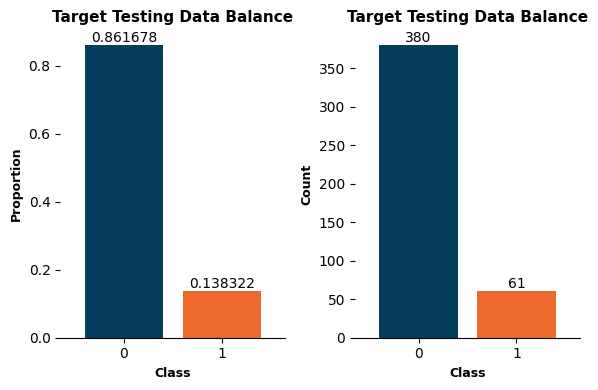

In [237]:
#Target testing data balance check
fig, axes = plt.subplots(1, 2, figsize=(6,4))

# Proportion chart
values_prop = y_test.value_counts(normalize=True).plot(
    kind='bar',
    color=['#053e5d', '#ee692d'],
    ax=axes[0],
    width=0.8
)
axes[0].bar_label(values_prop.containers[0])
axes[0].tick_params(axis='x', rotation=0)
axes[0].set_xlabel("Class", fontsize = 9, fontweight = 'bold')
axes[0].set_ylabel("Proportion", fontsize = 9, fontweight = 'bold')
axes[0].set_title("Target Testing Data Balance", fontsize = 11, fontweight = 'bold')

for spine in ['top','right','left']:
    axes[0].spines[spine].set_visible(False)

# Count chart
values_count = y_test.value_counts().plot(
    kind='bar',
    color=['#053e5d', '#ee692d'],
    ax=axes[1],
    width=0.8
)
axes[1].bar_label(values_count.containers[0])
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_xlabel("Class", fontsize = 9, fontweight = 'bold')
axes[1].set_ylabel("Count", fontsize = 9, fontweight = 'bold')
axes[1].set_title("Target Testing Data Balance", fontsize = 11, fontweight = 'bold')

for spine in ['top','right','left']:
    axes[1].spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


###Features Check using Boxplot and Heatmap

In [238]:
#Combine predictors and target.
training = pd.concat([x_training, y_training], axis=1)

In [239]:
# Let's collect all the categorical column in our features first
binary_columns = []
for col in x_training.columns:
  if training[col].nunique() == 2:
    binary_columns.append(col)

binary_columns

['OverTime']

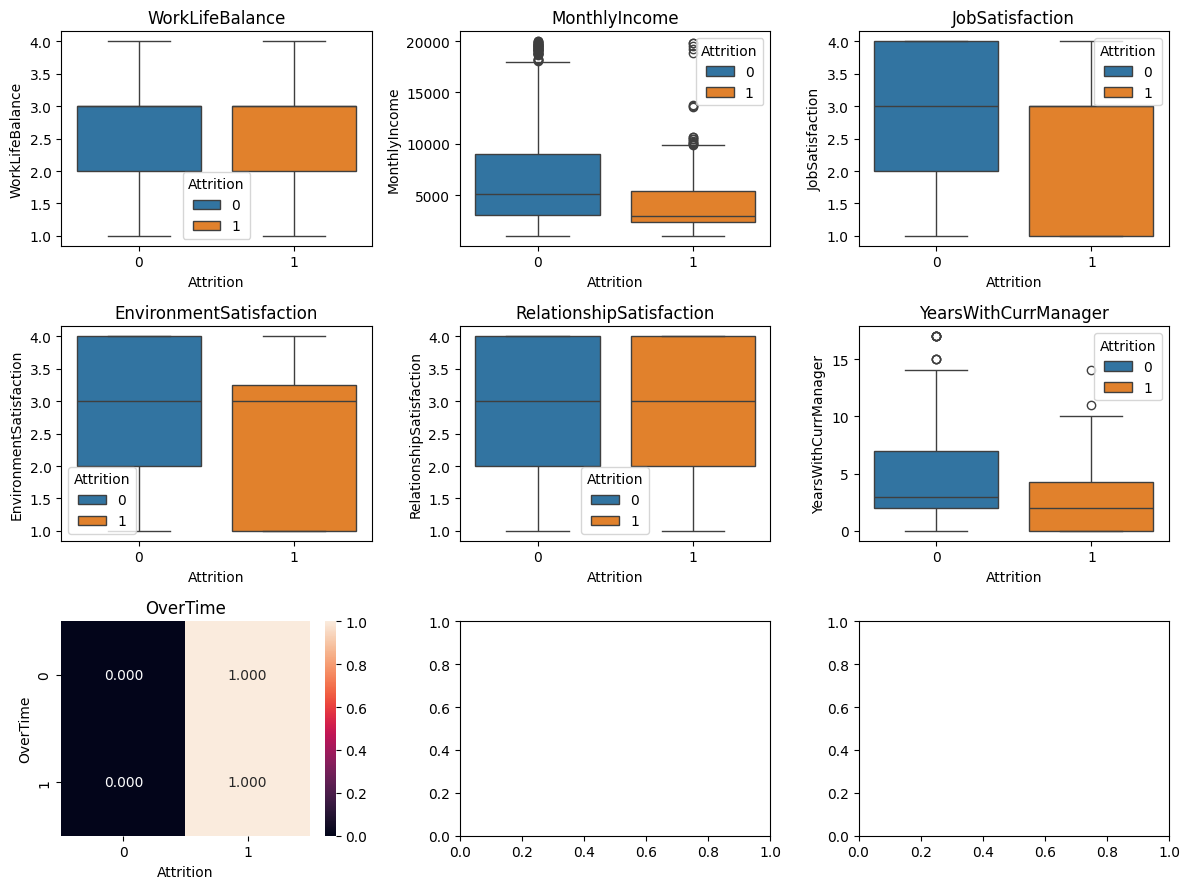

In [240]:
#Boxplot & Heatmap Visualization of each features
fig, ax = plt.subplots(3, 3, figsize = (12, 9))

for index, col in enumerate(x_training.columns):
  ax.flatten()[index].set_title(col)

  if col in binary_columns:
    data = training[['Attrition', col]].groupby('Attrition').value_counts(normalize=True).reset_index()
    data = data.pivot(columns='Attrition', index=col, values='Attrition')
    sns.heatmap(data, annot=True, fmt=",.3f", ax=ax.flatten()[index])
  else:
    sns.boxplot(data=training, x='Attrition', y=col, hue='Attrition', ax=ax.flatten()[index])

plt.tight_layout();

###Multicollinearity Check

In [241]:
#Check correlation of all features
x_training.corr()

,WorkLifeBalance,MonthlyIncome,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,YearsWithCurrManager,OverTime
WorkLifeBalance,1.000000,0.040840,-0.041340,0.025369,0.039748,-0.003758,-0.030722
MonthlyIncome,0.040840,1.000000,-0.020463,-0.013881,0.032840,0.336437,-0.012161
JobSatisfaction,-0.041340,-0.020463,1.000000,-0.045906,-0.006388,-0.017440,0.017045
EnvironmentSatisfaction,0.025369,-0.013881,-0.045906,1.000000,-0.016510,-0.009592,0.086793
RelationshipSatisfaction,0.039748,0.032840,-0.006388,-0.016510,1.000000,-0.006185,0.034573
YearsWithCurrManager,-0.003758,0.336437,-0.017440,-0.009592,-0.006185,1.000000,-0.041829
OverTime,-0.030722,-0.012161,0.017045,0.086793,0.034573,-0.041829,1.000000


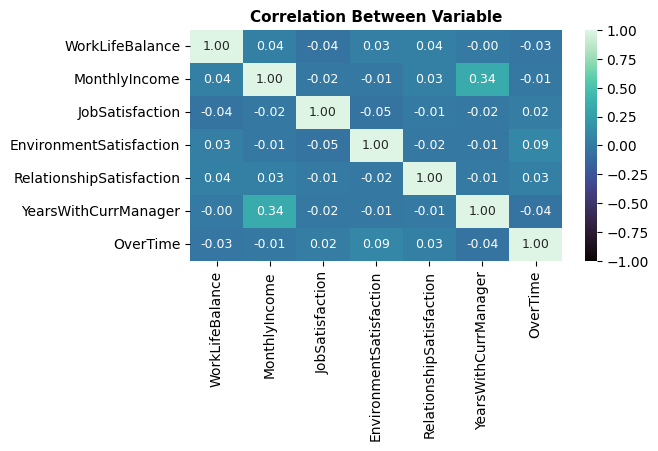

In [242]:
#Multicollinearity Check using correlation value
plt.subplots(figsize=(6,3))

plt.title('Correlation Between Variable', fontsize=11, fontweight='bold')

sns.heatmap(x_training.corr(),
            vmin=-1,
            vmax=1,
            cmap='mako',
            annot=True,
            annot_kws={"fontsize":9},
            fmt=",.2f"
            );

*There are no extremely correlation, so we meet the non-multicollinearity condition. There was no feature deleted then.*

In [243]:
x_training_model = x_training
x_test_model = x_test

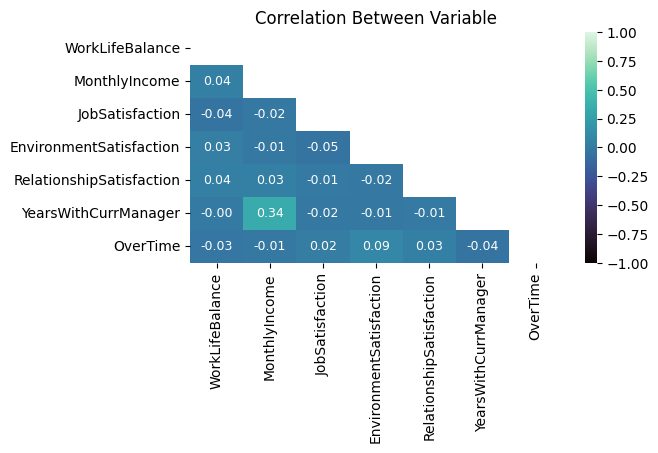

In [244]:
#Recheck the correlation after dropped
plt.subplots(figsize=(6,3))

plt.title('Correlation Between Variable')

mask = np.triu(np.ones_like(
    x_training_model.corr(), dtype=bool))

sns.heatmap(x_training_model.corr(),
            vmin=-1,
            vmax=1,
            cmap='mako',
            annot=True,
            mask=mask,
            annot_kws={"fontsize":9},
            fmt=",.2f"
            );

In [245]:
#VIF score for variable dropping validation
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x_training.columns

vif_data["VIF"] = [variance_inflation_factor(x_training.values, i) for i in range(len(x_training.columns))]

vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
0,WorkLifeBalance,10.063955
4,RelationshipSatisfaction,6.200439
3,EnvironmentSatisfaction,5.915624
2,JobSatisfaction,5.686559
1,MonthlyIncome,3.123672
5,YearsWithCurrManager,2.537402
6,OverTime,1.416882


##Training Logistic Regression Model

In [246]:
model = LogisticRegression(
    solver='lbfgs',
    penalty='l2',
    C=10,
    class_weight='balanced',
    max_iter=1000
)
model.fit(x_training_model, y_training)

LogisticRegression(C=10, class_weight='balanced', max_iter=1000)

In [247]:
y_training.unique()

array([0, 1])

##Probability & Prediction Model

In [248]:
# First, predict in our training dataset
x_training_model

,WorkLifeBalance,MonthlyIncome,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,YearsWithCurrManager,OverTime
714,2,17399.0,4,4,3,3,0
135,3,4941.0,2,2,4,1,0
1271,3,2679.0,2,2,2,0,0
477,3,18200.0,2,1,3,7,0
806,3,10445.0,2,2,4,0,0
...,...,...,...,...,...,...,...
1130,2,3407.0,3,2,4,8,0
1294,1,6870.0,2,2,1,2,0
860,3,2853.0,4,3,2,0,1
1459,3,4025.0,2,4,1,3,1


In [249]:
model.predict_proba(x_training_model)

# from this result, if probability in the right column (target = 1) > 0.5: label = 1

array([[0.92232645, 0.07767355],
       [0.5251519 , 0.4748481 ],
       [0.409117  , 0.590883  ],
       ...,
       [0.26859556, 0.73140444],
       [0.27495185, 0.72504815],
       [0.58931862, 0.41068138]])

In [250]:
#if prob > 0.5, then it will be labeled 1. Otherwise, 0
model.predict(x_training_model)

array([0, 0, 1, ..., 1, 1, 0])

###Predicting Training Data

In [251]:
#Predict the training data
x_training_result = x_training_model.copy()
x_training_result['prediction'] = model.predict(x_training_model)
x_training_result[['prob_no', 'prob_yes']] = model.predict_proba(x_training_model)
x_training_result[['prob_yes', 'prediction']]

,prob_yes,prediction
714,0.077674,0
135,0.474848,0
1271,0.590883,1
477,0.169026,0
806,0.368750,0
...,...,...
1130,0.329902,0
1294,0.587807,1
860,0.731404,1
1459,0.725048,1


###Predicting Testing Data

In [252]:
#Predict the testing data
x_test_result = x_test_model.copy()
x_test_result['prediction'] = model.predict(x_test_model)
x_test_result[['prob_no', 'prob_yes']] = model.predict_proba(x_test_model)
x_test_result[['prob_yes', 'prediction']]

,prob_yes,prediction
1041,0.272412,0
184,0.373522,0
1222,0.360924,0
67,0.481248,0
220,0.152692,0
...,...,...
1047,0.410464,0
331,0.679115,1
323,0.819375,1
654,0.161652,0


##Model Evaluation

### Metrics Evaluation

In [253]:
#Training and Testing Evaluation Differences
def evaluate_model(y_true, y_pred, y_prob, dataset_name="Test"):
    return {
        "Dataset": dataset_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_prob)
    }

#Training data evaluation
train_eval = evaluate_model(
    y_true = y_training,
    y_pred = x_training_result['prediction'],
    y_prob = x_training_result['prob_yes'],
    dataset_name="Training"
)

#Testing data evaluation
test_eval = evaluate_model(
    y_true = y_test,
    y_pred = x_test_result['prediction'],
    y_prob = x_test_result['prob_yes'],
    dataset_name="Test"
)

eval_df = pd.DataFrame([train_eval, test_eval])
print(eval_df)


    Dataset  Accuracy  Precision    Recall  F1 Score       AUC
0  Training  0.709427   0.333333  0.698864  0.451376  0.776344
1      Test  0.736961   0.286822  0.606557  0.389474  0.742494


###Confusion Matrix

=== Training Data Evaluation ===

Classification Report (Training):
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       853
           1       0.33      0.70      0.45       176

    accuracy                           0.71      1029
   macro avg       0.63      0.71      0.63      1029
weighted avg       0.82      0.71      0.74      1029



[[607 246]
 [ 53 123]]


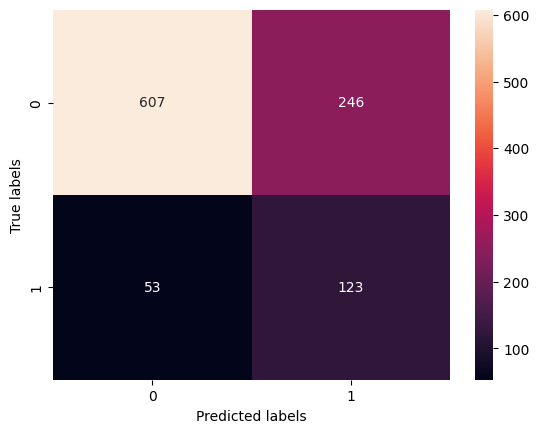


=== Testing Data Evaluation ===

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       380
           1       0.29      0.61      0.39        61

    accuracy                           0.74       441
   macro avg       0.60      0.68      0.61       441
weighted avg       0.84      0.74      0.77       441



[[288  92]
 [ 24  37]]


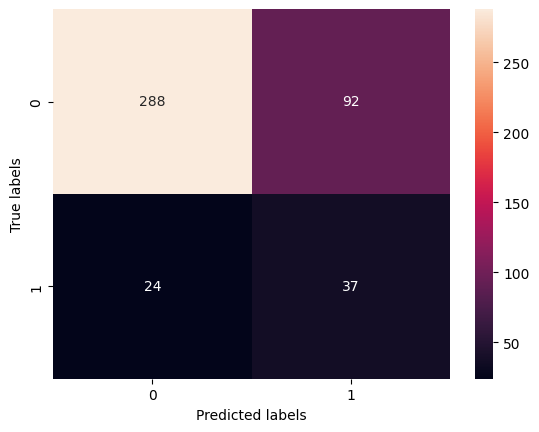

In [254]:
# Classification report & confusion matrix data Training
print("=== Training Data Evaluation ===")
print("\nClassification Report (Training):")
print(classification_report(y_training, x_training_result['prediction']))
print('\n')
confusion_train = confusion_matrix(y_training, x_training_result['prediction'])
print(confusion_train)
sns.heatmap(confusion_train, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Classification report & confusion matrix data Testing
print("\n=== Testing Data Evaluation ===")
print("\nClassification Report (Test):")
print(classification_report(y_test, x_test_result['prediction']))
print('\n')
confusion_test = confusion_matrix(y_test, x_test_result['prediction'])
print(confusion_test)
sns.heatmap(confusion_test, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

###ROC - AUC

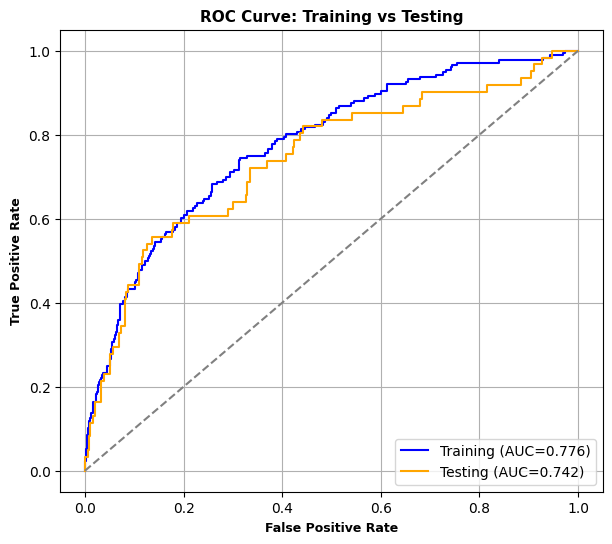

In [255]:
#ROC Curve Plot
#Training
fpr_train, tpr_train, _ = roc_curve(y_training, x_training_result['prob_yes'])
auc_train = roc_auc_score(y_training, x_training_result['prob_yes'])


#Testing
fpr_test, tpr_test, _ = roc_curve(y_test, x_test_result['prob_yes'])
auc_test = roc_auc_score(y_test, x_test_result['prob_yes'])


# Plot
plt.figure(figsize=(7,6))
plt.plot(fpr_train, tpr_train, color='blue',
         label=f"Training (AUC={auc_train:.3f})")
plt.plot(fpr_test, tpr_test, color='orange',
         label=f"Testing (AUC={auc_test:.3f})")

# Baseline
plt.plot([0,1],[0,1],'--', color='gray')

# Labels
plt.xlabel("False Positive Rate", fontsize = 9, fontweight = 'bold')
plt.ylabel("True Positive Rate", fontsize = 9, fontweight = 'bold')
plt.title("ROC Curve: Training vs Testing" , fontsize = 11, fontweight = 'bold')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


##Feature Importance

In [256]:
from sklearn.preprocessing import MinMaxScaler

ss_scaler = MinMaxScaler()
x_scaled = ss_scaler.fit_transform(x_training_model)
x_training_scaled = pd.DataFrame(x_scaled, columns=x_training_model.columns)

model_scaled = LogisticRegression(
    solver='lbfgs',
    penalty='l2',
    C=10,
    class_weight='balanced',
    max_iter=1000
)
model_scaled.fit(x_training_scaled, y_training)

LogisticRegression(C=10, class_weight='balanced', max_iter=1000)

<Axes: title={'center': 'Predictor Strength each Column'}, ylabel='Feature'>

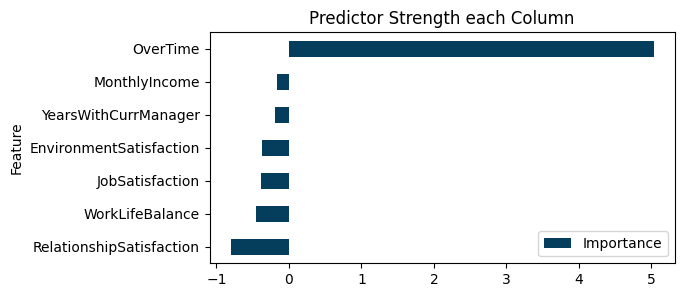

In [257]:
# Get coefficient https://christophm.github.io/interpretable-ml-book/logistic.html
coefficients = model_scaled.coef_[0]
coefficients = np.sign(coefficients) * np.exp(coefficients)

feature_importance = pd.DataFrame({'Feature': x_training_model.columns, 'Importance': coefficients})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(kind='barh', x='Feature', y='Importance', title="Predictor Strength each Column", figsize=(6, 3), color='#053e5d')

*From the feature importance results, factors with positive values increase the likelihood of attrition when their values are higher, while factors with negative values increase the likelihood of attrition when their values are lower.*

#Simulation Analysis based on Logistic Regression Result

In [258]:
#Final features data for all data (before split)
df_sim = df_encoded.drop(columns=[ 'Attrition'])
df_sim

,WorkLifeBalance,MonthlyIncome,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,YearsWithCurrManager,OverTime
0,1,5993.0,4,2,1,5,1
1,3,5130.0,2,3,4,7,0
2,3,2090.0,3,4,2,0,1
3,3,2909.0,3,4,3,0,1
4,3,3468.0,2,1,4,2,0
...,...,...,...,...,...,...,...
1465,3,2571.0,4,3,3,3,0
1466,3,9991.0,1,4,1,7,0
1467,3,6142.0,2,2,2,3,1
1468,2,5390.0,2,4,4,8,0


###Scenario 1: 50% reduction in overtime employees

In [259]:
baseline_observed = label.mean()   #real case as baseline

#model prediction now
p_now = model.predict_proba(df_sim)[:,1]
p_now_mean = p_now.mean()

X_scen = df_sim.copy()

# Cari index karyawan yang OverTime=1
idx_overtime = X_scen[X_scen['OverTime'] == 1].index

# Set % Overtime reducing
np.random.seed(42)
sample_idx = np.random.choice(idx_overtime,
                              size=int(0.5 * len(idx_overtime)),
                              replace=False)

# Set selected OverTime = 0
X_scen.loc[sample_idx, 'OverTime'] = 0

p_scen = model.predict_proba(X_scen)[:,1]
p_scen_mean = p_scen.mean()

# 4) Delta & Attrition Proyection (Adoption model predicting result into our real case)
delta = p_scen_mean - p_now_mean

#For counting employee
n_emp = len(df_sim)

projected_attrition_A = baseline_observed + delta
expected_count_A = projected_attrition_A * n_emp

# Model-based expected counts
expected_now_model = p_now_mean * n_emp
expected_scen_model = p_scen_mean * n_emp
print(f"==50% Reduce Overtime Employee Scenario==")
print(f"Actual Attrition                   : {baseline_observed:.4f} ({baseline_observed*n_emp:.0f} orang)")
print(f"Mean model prob (now)              : {p_now_mean:.4f} ({expected_now_model:.1f} orang)")
print(f"Mean model prob (scen)             : {p_scen_mean:.4f} ({expected_scen_model:.1f} orang)")
print(f"Delta (p_scen - p_now) (model)     : {delta:.4f}")
print(f"Projected Attrition                : {projected_attrition_A:.4f} ({projected_attrition_A*n_emp:.0f} orang)")


==50% Reduce Overtime Employee Scenario==
Actual Attrition                   : 0.1612 (237 orang)
Mean model prob (now)              : 0.4159 (611.4 orang)
Mean model prob (scen)             : 0.3687 (541.9 orang)
Delta (p_scen - p_now) (model)     : -0.0473
Projected Attrition                : 0.1140 (168 orang)


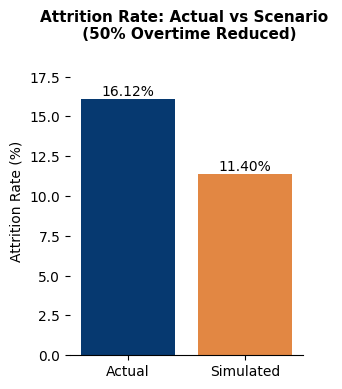

In [260]:
# Visualization
labels = ['Actual', 'Simulated']
values = [
    baseline_observed * 100,
    projected_attrition_A * 100
]

fig, ax = plt.subplots(figsize=(3, 4))
bars = ax.bar(labels, values, color=['#063970', '#e28743'])

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}%',
        ha='center', va='bottom', fontsize=10
    )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.set_title("Attrition Rate: Actual vs Scenario \n (50% Overtime Reduced)", fontsize=11, fontweight='bold')
ax.set_ylabel("Attrition Rate (%)")

ax.set_ylim(0, max(values) * 1.2)
plt.show()


###Scenario 2: 75% reduction in overtime employees

In [261]:
baseline_observed = label.mean()   #real case as baseline

#model prediction now
p_now = model.predict_proba(df_sim)[:,1]
p_now_mean = p_now.mean()

X_scen = df_sim.copy()

# Cari index karyawan yang OverTime=1
idx_overtime = X_scen[X_scen['OverTime'] == 1].index

# Set % Overtime reducing
np.random.seed(42)
sample_idx = np.random.choice(idx_overtime,
                              size=int(0.75 * len(idx_overtime)),
                              replace=False)

# Set selected OverTime = 0
X_scen.loc[sample_idx, 'OverTime'] = 0

p_scen = model.predict_proba(X_scen)[:,1]
p_scen_mean = p_scen.mean()

# 4) Delta & Attrition Proyection (Adoption model predicting result into our real case)
delta = p_scen_mean - p_now_mean

#For counting employee
n_emp = len(df_sim)

projected_attrition_B = baseline_observed + delta
expected_count_B = projected_attrition_B * n_emp

# Model-based expected counts
expected_now_model = p_now_mean * n_emp
expected_scen_model = p_scen_mean * n_emp
print(f"==75% Reduce Overtime Employee Scenario==")
print(f"Actual Attrition                   : {baseline_observed:.4f} ({baseline_observed*n_emp:.0f} orang)")
print(f"Mean model prob (now)              : {p_now_mean:.4f} ({expected_now_model:.1f} orang)")
print(f"Mean model prob (scen)             : {p_scen_mean:.4f} ({expected_scen_model:.1f} orang)")
print(f"Delta (p_scen - p_now) (model)     : {delta:.4f}")
print(f"Projected Attrition                : {projected_attrition_B:.4f} ({projected_attrition_B*n_emp:.0f} orang)")


==75% Reduce Overtime Employee Scenario==
Actual Attrition                   : 0.1612 (237 orang)
Mean model prob (now)              : 0.4159 (611.4 orang)
Mean model prob (scen)             : 0.3448 (506.8 orang)
Delta (p_scen - p_now) (model)     : -0.0711
Projected Attrition                : 0.0901 (132 orang)


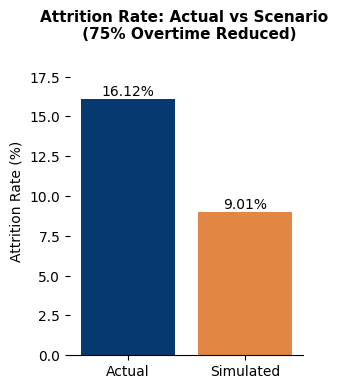

In [262]:
# Visualization
labels = ['Actual', 'Simulated']
values = [
    baseline_observed * 100,
    projected_attrition_B * 100
]

fig, ax = plt.subplots(figsize=(3, 4))
bars = ax.bar(labels, values, color=['#063970', '#e28743'])

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}%',
        ha='center', va='bottom', fontsize=10
    )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.set_title("Attrition Rate: Actual vs Scenario \n (75% Overtime Reduced)", fontsize=11, fontweight='bold')
ax.set_ylabel("Attrition Rate (%)")

ax.set_ylim(0, max(values) * 1.2)
plt.show()


###Scenario 3: (100% Reduction) No employees worked overtime.

In [263]:
baseline_observed = label.mean()   #real case as baseline

#model prediction now
p_now = model.predict_proba(df_sim)[:,1]
p_now_mean = p_now.mean()

#Scenario: No employees worked overtime, all overtime data = 0
X_scen = df_sim.copy()
X_scen['OverTime'] = 0

p_scen = model.predict_proba(X_scen)[:,1]
p_scen_mean = p_scen.mean()

# 4) Delta & Attrition Proyection (Adoption model predicting result into our real case)
delta = p_scen_mean - p_now_mean

#For counting employee
n_emp = len(df_sim)

projected_attrition_C = baseline_observed + delta
expected_count_C = projected_attrition_C * n_emp

# Model-based expected counts
expected_now_model = p_now_mean * n_emp
expected_scen_model = p_scen_mean * n_emp
print(f"==No Overtime Employee Scenario==")
print(f"Actual Attrition                   : {baseline_observed:.4f} ({baseline_observed*n_emp:.0f} orang)")
print(f"Mean model prob (now)              : {p_now_mean:.4f} ({expected_now_model:.1f} orang)")
print(f"Mean model prob (scen)             : {p_scen_mean:.4f} ({expected_scen_model:.1f} orang)")
print(f"Delta (p_scen - p_now) (model)     : {delta:.4f}")
print(f"Projected Attrition                : {projected_attrition_C:.4f} ({projected_attrition_C*n_emp:.0f} orang)")


==No Overtime Employee Scenario==
Actual Attrition                   : 0.1612 (237 orang)
Mean model prob (now)              : 0.4159 (611.4 orang)
Mean model prob (scen)             : 0.3207 (471.5 orang)
Delta (p_scen - p_now) (model)     : -0.0952
Projected Attrition                : 0.0661 (97 orang)


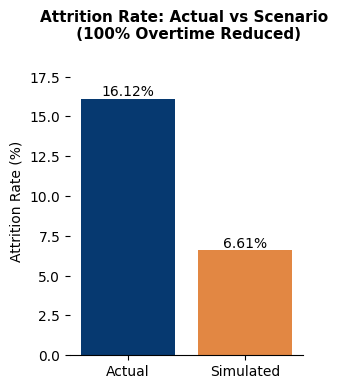

In [264]:
# Visualization
labels = ['Actual', 'Simulated']
values = [
    baseline_observed * 100,
    projected_attrition_C * 100
]

fig, ax = plt.subplots(figsize=(3, 4))
bars = ax.bar(labels, values, color=['#063970', '#e28743'])

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}%',
        ha='center', va='bottom', fontsize=10
    )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.set_title("Attrition Rate: Actual vs Scenario \n (100% Overtime Reduced)", fontsize=11, fontweight='bold')
ax.set_ylabel("Attrition Rate (%)")

ax.set_ylim(0, max(values) * 1.2)
plt.show()


###Scenario 4: No 'Low' Score in Relationship Satisfaction

In [265]:
#Set our real attrition rate as baseline
baseline_observed = label.mean()

p_now = model.predict_proba(df_sim)[:,1]
p_now_mean = p_now.mean()

# Scenario RelationshipSatisfaction 1 -> 2
X_scen_rs = df_sim.copy()
X_scen_rs.loc[X_scen_rs['RelationshipSatisfaction'] == 1, 'RelationshipSatisfaction'] = 2

p_scen_rs = model.predict_proba(X_scen_rs)[:,1]
p_scen_rs_mean = p_scen_rs.mean()

delta_rs = p_scen_rs_mean - p_now_mean
projected_attrition_rs = baseline_observed + delta_rs
print(f"==No Low Relationship Score by Employee Scenario==")
print(f"Actual Attrition               : {baseline_observed:.4f}")
print(f"Mean model prob (now)          : {p_now_mean:.4f}")
print(f"Mean model prob (scenario RS) : {p_scen_rs_mean:.4f}")
print(f"Delta (scenario - now)         : {delta_rs:.4f}")
print(f"Projected Attrition (RS)      : {projected_attrition_rs:.4f} ({projected_attrition_rs*100:.2f}%)")


==No Low Relationship Score by Employee Scenario==
Actual Attrition               : 0.1612
Mean model prob (now)          : 0.4159
Mean model prob (scenario RS) : 0.4132
Delta (scenario - now)         : -0.0027
Projected Attrition (RS)      : 0.1585 (15.85%)


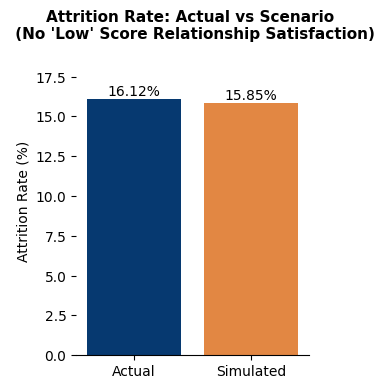

In [266]:
# Visualization
labels = ['Actual', 'Simulated']
values = [
    baseline_observed * 100,
    projected_attrition_rs * 100
]

fig, ax = plt.subplots(figsize=(3, 4))
bars = ax.bar(labels, values, width=0.8, color=['#063970', '#e28743'])

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}%',
        ha='center', va='bottom', fontsize=10
    )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.set_title("Attrition Rate: Actual vs Scenario \n (No 'Low' Score Relationship Satisfaction)", fontsize=11, fontweight='bold')
ax.set_ylabel("Attrition Rate (%)")

ax.set_ylim(0, max(values) * 1.2)
plt.show()


###Scenario 5: Overtime Reduction + No Bad Score Work Life Balance

In [267]:
baseline_observed = label.mean()
p_now = model.predict_proba(df_sim)[:,1]
p_now_mean = p_now.mean()
n_emp = len(df_sim)

print(f"Actual Attrition          : {baseline_observed:.4f}")
print(f"Mean model prob (now)     : {p_now_mean:.4f}")
print(f"Expected # attrition (now): {p_now_mean*n_emp:.1f}")
print("="*60)

# ===============================
# Skenario A: 50% Overtime + No Bad WLB
# ===============================
X_A = df_sim.copy()
# Randomly set 50% of overtime=1 employees to 0
overtime_idx = X_A[X_A["OverTime"]==1].sample(frac=0.5, random_state=42).index
X_A.loc[overtime_idx, "OverTime"] = 0
X_A.loc[X_A["RelationshipSatisfaction"]==1, "RelationshipSatisfaction"] = 2

p_A = model.predict_proba(X_A)[:,1]
p_A_mean = p_A.mean()

print("Skenario A: 50% Overtime + No Low Relationship")
print(f"Mean model prob (scenario A) : {p_A_mean:.4f}")
print(f"Delta (A - now)              : {p_A_mean - p_now_mean:.4f}")
print(f"Projected attrition (A)      : {baseline_observed + (p_A_mean - p_now_mean):.4f} ({(baseline_observed + (p_A_mean - p_now_mean))*100:.2f}%)")
print(f"Expected # attrition (A)     : {p_A_mean*n_emp:.1f}")
print("="*60)

# ===============================
# Skenario B: 25% Overtime + No Bad WLB
# ===============================
X_B = df_sim.copy()
# Randomly set 75% of overtime=1 employees to 0
overtime_idx = X_B[X_B["OverTime"]==1].sample(frac=0.75, random_state=42).index
X_B.loc[overtime_idx, "OverTime"] = 0
X_B.loc[X_B["RelationshipSatisfaction"]==1, "RelationshipSatisfaction"] = 2

p_B = model.predict_proba(X_B)[:,1]
p_B_mean = p_B.mean()

print("Skenario B: 25% Overtime + No Low Relationship")
print(f"Mean model prob (scenario B) : {p_B_mean:.4f}")
print(f"Delta (B - now)              : {p_B_mean - p_now_mean:.4f}")
print(f"Projected attrition (B)      : {baseline_observed + (p_B_mean - p_now_mean):.4f} ({(baseline_observed + (p_B_mean - p_now_mean))*100:.2f}%)")
print(f"Expected # attrition (B)     : {p_B_mean*n_emp:.1f}")
print("="*60)

# ===============================
# Skenario C: 0% Overtime + No Bad WLB
# ===============================
X_C = df_sim.copy()
X_C["OverTime"] = 0
X_C.loc[X_C["RelationshipSatisfaction"]==1, "RelationshipSatisfaction"] = 2

p_C = model.predict_proba(X_C)[:,1]
p_C_mean = p_C.mean()

print("Skenario C: 0% Overtime + No Low Relationship")
print(f"Mean model prob (scenario C) : {p_C_mean:.4f}")
print(f"Delta (C - now)              : {p_C_mean - p_now_mean:.4f}")
print(f"Projected attrition (C)      : {baseline_observed + (p_C_mean - p_now_mean):.4f} ({(baseline_observed + (p_C_mean - p_now_mean))*100:.2f}%)")
print(f"Expected # attrition (C)     : {p_C_mean*n_emp:.1f}")
print("="*60)


Actual Attrition          : 0.1612
Mean model prob (now)     : 0.4159
Expected # attrition (now): 611.4
Skenario A: 50% Overtime + No Low Relationship
Mean model prob (scenario A) : 0.3659
Delta (A - now)              : -0.0500
Projected attrition (A)      : 0.1112 (11.12%)
Expected # attrition (A)     : 537.8
Skenario B: 25% Overtime + No Low Relationship
Mean model prob (scenario B) : 0.3420
Delta (B - now)              : -0.0739
Projected attrition (B)      : 0.0873 (8.73%)
Expected # attrition (B)     : 502.7
Skenario C: 0% Overtime + No Low Relationship
Mean model prob (scenario C) : 0.3180
Delta (C - now)              : -0.0979
Projected attrition (C)      : 0.0633 (6.33%)
Expected # attrition (C)     : 467.4


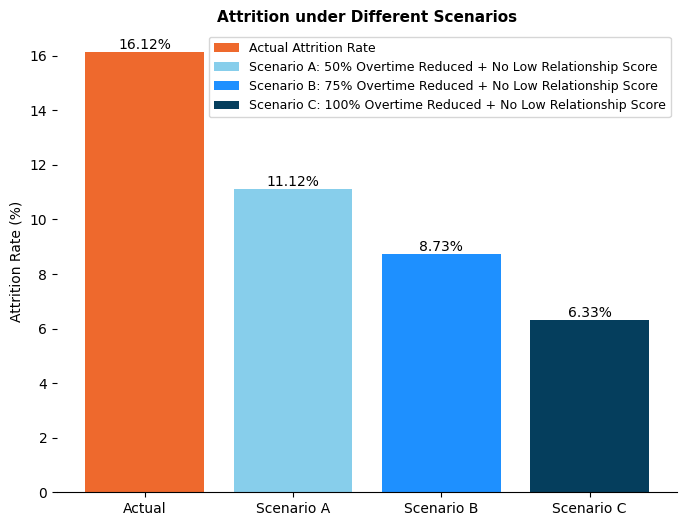

In [268]:
from matplotlib.patches import Patch

# Visualization Scenario
labels = ["Actual", "Scenario A", "Scenario B", "Scenario C"]
attrition_rates = [
    baseline_observed,
    baseline_observed + (p_A_mean - p_now_mean),
    baseline_observed + (p_B_mean - p_now_mean),
    baseline_observed + (p_C_mean - p_now_mean),
]

# Plot bar
plt.figure(figsize=(8,6))
bars = plt.bar(
    labels,
    [x*100 for x in attrition_rates],
    color=["#ee692d","skyblue","dodgerblue","#053e5d"]
)

for bar, rate in zip(bars, attrition_rates):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{rate*100:.2f}%",
        ha='center', va='bottom', fontsize=10
    )

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

plt.ylabel("Attrition Rate (%)")
plt.title("Attrition under Different Scenarios", fontsize=11, fontweight='bold')

legend_elements = [
    Patch(facecolor="#ee692d", label="Actual Attrition Rate"),
    Patch(facecolor="skyblue", label="Scenario A: 50% Overtime Reduced + No Low Relationship Score"),
    Patch(facecolor="dodgerblue", label="Scenario B: 75% Overtime Reduced + No Low Relationship Score"),
    Patch(facecolor="#053e5d", label="Scenario C: 100% Overtime Reduced + No Low Relationship Score"),
]

plt.legend(handles=legend_elements, loc="upper right", fontsize=9)
plt.show()
